<a href="https://colab.research.google.com/github/victorviro/Statistics-and-probability/blob/master/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting

This notebook is intended to provide an **introduction to forecasting methods**. We use **python** throughout the notebook.

In [ ]:
!pip install statsmodels==0.12.2
!pip install scikit-learn==0.24.1
!pip install pandas==1.1.5
!pip install seaborn==0.11.1
!pip install numpy==1.19.5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')

# Table of contents

1. [Introduction](#1)
    1. [What can be forecast?](#1.1)
    2. [Forecasting concepts](#1.2)
    3. [Forecasting methods](#1.3)
    4. [Basics steps in a forecasting task](#1.4)
    5. [Statistical forecasting perspective](#1.5)
    6. [Notation](#1.6)
2. [Time series graphics](#2)
    1. [Time plots](#2.1)
    2. [Time series patterns](#2.2)
    3. [Seasonal plots](#2.3)
    4. [Scatterplots](#2.4)
    5. [Lag plots](#2.5)
    6. [Autocorrelation](#2.6)
3. [Forecasting tools](#3)
    1. [Simple forecasting methods](#3.1)
    2. [Transformations and adjustments](#3.2)
    3. [Residual diagnostics](#3.3)
    4. [Evaluating forecast accuracy](#3.4)
    5. [Prediction intervals](#3.5)
4. [Time series decomposition](#4)
    1. [Time series components](#4.1)
    2. [Moving averages](#4.2)
    3. [Classical decomposition](#4.3)
    4. [Other decomposition mehtods](#4.4)
5. [Exponential smoothing](#5)
    1. [Simple exponential smoothing](#5.1)
    2. [Trend methods](#5.2)
    3. [Hotl-Winters](#5.3)
    4. [Generalization of exponential smoothing methods](#5.4)
    5. [State space models for exponential smoothing](#5.5)
    6. [Estimation and model selection](#5.6)
6. [ARIMA models](#6)
    1. [Stationarity and differencing](#6.1)
    2. [Autoregressive models (AR)](#6.2)
    3. [Moving average models (MA)](#6.3)
    4. [Non-seasonal ARIMA models](#6.4)
    5. [Seasonal ARIMA models (SARIMA)](#6.5)
7. [Other forecasting models](#7)
    1. [Advanced forecasting methods](#7.1)
8. [Forecasting issues](#8)
9. [References and further reading](#9)



# Introduction <a name="1"></a>

Forecasting is a common statistical task in business, where it helps to inform decisions. However, business forecasting is frequently confused with planning and goals.

- **Forecasting** is about **predicting the future** as accurately as possible, **given all of the data available**.

- **Goals** are **what we would like to have happen**. Goals should be linked to forecasts and plans.

- **Planning** is a response to forecasts and goals. Planning involves **determining** the appropriate **actions** that are required **to make our forecasts match our goals**.

## What can be forecast? <a name="1.1"></a>

**Forecasting is required in many situations**: scheduling staff in a call center next week requires forecasts of call volumes; stocking an inventory requires forecasts of stock requirements. Forecasts can be required several years in advance, or only a few minutes beforehand.

**Some things are easier to forecast**. The weather tomorrow morning can be forecast precisely, but tomorrow’s lotto numbers cannot be forecast precisely. The predictability of an event or quantity **depends on several conditions**:

- How well we **understand the factors** that contribute/**influence to it**.
- How much **data** is **available**.
- Whether the forecasts can affect the thing we are trying to forecast.

For example:

- Forecasts of electricity demand can be highly accurate because all three factors are well-known (temperature, calendar variation such as holidays, and economic conditions). Provided there is a sufficient history of data on electricity demand and weather conditions, the forecasts can be remarkably accurate.

- On the other hand, when forecasting currency exchange rates, only one of the conditions is satisfied (plenty of available data). However, we have a limited understanding of the factors that affect exchange rates, and forecasts of the exchange rate have a direct effect on the rates themselves.

In a changing environment, **a good forecasting model captures the way in which things are changing**. It's normally assumed that the way in which the environment is changing will continue into the future. A forecasting model is intended to capture the way things move, not just where things are.

In the early stages of a forecasting project, **decisions** need to be made **about what should be forecast**. For example, if forecasts are required for items in a manufacturing environment, it is necessary to ask whether forecasts are needed for:

- every product line, or for groups of products?
- every sales outlet, or for outlets grouped by region, or only for total sales?
- weekly data, monthly data, or annual data?

It is also necessary to consider the **forecasting horizon**. Will forecasts be required for one month in advance, for 6 months, or for ten years? Different types of models will be necessary.

**How frequently are forecasts required?** Forecasts that need to be produced frequently are better done using an automated system than with methods that require careful manual work (**talk to the people who will use the forecasts to ensure that we understand their needs, and how the forecasts are to be used**).

## Forecasting concepts <a name="1.2"></a>

**Short/Medium/Long-term forecasts**

We may need short-term, medium-term, or long-term forecasts, depending on the specific application.

- **Short-term forecasts** are needed for the scheduling of personnel, production, and transportation. As part of the scheduling process, forecasts of demand are often also required.

- **Medium-term forecasts** are needed to determine future resource requirements, in order to purchase raw materials, hire personnel, or buy machinery and equipment.

- **Long-term forecasts** are used in strategic planning. Such decisions must take account of market opportunities, environmental factors, and internal resources.

**Frequency of a time series**

A time series can be thought of as a list of numbers, along with some information about what times those numbers were recorded. The "frequency" is the **number of observations before the seasonal pattern repeats**:

- Annual (1)
- Quarterly (4)
- Monthly (12)
- Weekly (52)

**Note**: Actually, there are not 52 weeks in a year (52.18 on average), but most functions we will use require integer frequency.

If the frequency of observations is greater than once per week, then there is usually more than one way of handling the frequency. For example, data with daily observations might have a weekly seasonality (frequency 7) or an annual seasonality (365.25). Similarly, data that are observed every minute might have an hourly seasonality (60), a daily seasonality ($24 \times 60 = 1440$), a weekly seasonality ($24 \times 60 \times 7 = 10080$) and an annual seasonality ($24 \times 60 \times 365.25 = 525960$). We usually need to decide which of these is the most important.

## Forecasting methods <a name="1.3"></a>

Forecasting methods can be simple, such as using the most recent observation as a forecast (which is called the **naïve method**), or highly complex, such as neural nets. Forecasting methods **can be applied when two conditions are satisfied**:

- numerical **information about the past is available**;
- it is reasonable to **assume** that some aspects of the **past patterns will continue into the future**.

There is a wide range of forecasting methods, often developed within disciplines for specific purposes. **Each method has its own properties, accuracies, and costs** that must be considered when choosing a specific method.

**Time series forecasting**

Anything that is observed sequentially over time is a time series. Here we will only consider time series that are observed at regular intervals of time (e.g., hourly, daily, weekly, monthly, quarterly, annually).

When forecasting time series data, the aim is to estimate how the sequence of observations will continue into the future.

The **simplest time series forecasting methods use only information on the variable to be forecast**, and make no attempt to discover the factors that affect its behaviour. Therefore they will extrapolate trend and seasonal patterns, but they ignore all other information. Time series models used for forecasting include **decomposition models, exponential smoothing models and ARIMA models**, etc.

**Explanatory model**

Predictor variables are often useful in time series forecasting. An explanatory model is useful because it **incorporates information about other variables, rather than only historical values of the variable to be forecast**. The model to be used in forecasting depends on the resources and data available, the accuracy of the competing models, and the way in which the forecasting model is to be used.

## The basic steps in a forecasting task <a name="1.4"></a>

1. **Problem definition**. Often the the most difficult part. It **requires understanding how the forecasts will be used**, who requires the forecasts, and how the forecasting function fits within the organisation requiring the forecasts. Talk to everyone who will be involved in collecting data, maintaining databases, and using the forecasts for future planning.

2. **Gathering information**. Occasionally, old data will be less useful due to structural changes in the system being forecast; then we may choose to use only the most recent data. However, good statistical models will handle evolutionary changes in the system; we don’t have tothrow away good data unnecessarily.

3. **Preliminary (exploratory) analysis**. Start by **graphing the data**. **Are there patterns** (trend, seasonality, cycles)? Are there any **outliers** in the data that need to be explained by those with expert knowledge? How strong are the **relationships among the variables available** for analysis?

4. **Choose and fit models**. The best model to use depends on the availability of data, the strength of relationships between the forecast variable and any explanatory variables, and how the forecasts are to be used. It is common to **compare** two or three **potential** models. Each model is itself an artificial construct that is based on a set of assumptions (explicit and implicit) and usually involves one or more parameters which must be estimated using the known historical data.

5. **Evaluating a forecasting model**. Once a model has been selected and its parameters estimated, the model is used to make forecasts. The performance of the model can only be properly evaluated after the data for the forecast period have become available.

## The statistical forecasting perspective <a name="1.5"></a>

The thing we are trying to forecast is unknown (a random variable that could take a range of possible values).

Predicting the next month is relatively close, we usually have a good idea of what the likely value could be. On the other hand, if we are forecasting for the same month next year, the possible values it could take are much more variable. In most forecasting situations, the variation associated with the thing we are forecasting will shrink as the event approaches. In other words, **the further ahead we forecast, the more uncertain we are**.

When we obtain a forecast, we are estimating the middle of the range of possible values the random variable could take. **Often, a forecast is accompanied by a prediction interval giving a range of values the random variable could take with relatively high probability**. For example, a 95% prediction interval contains a range of values which should include the actual future value with a probability 95%. Rather than plotting individual possible futures, we usually show these prediction intervals instead.

## Notation <a name="1.6"></a>

We will use the subscript $t$ for time. For example, $y_t$ will denote the observation at time $t$. Suppose we denote all the information we have observed as $I$ and we want to forecast $y_t$. We then write $y_t|I$ meaning “the random variable $y_t$ given what we know $I$.” The set of values that this random variable could take, along with their relative probabilities, is known as the “probability distribution” of  $y_t|I$. In forecasting, we call this the forecast distribution.

When we talk about the “forecast,” we usually mean the average value of the forecast distribution, and we put a “hat” over $y$ to show this. Thus, we write the forecast of $y_t$ as $\hat{y}_t$, meaning the average of the possible values that $y_t$ could take given everything we know. Occasionally, we will use $\hat{y}_t$ to refer to the median (or middle value) of the forecast distribution instead.

It is often useful to specify exactly what information we have used in calculating the forecast. Then we will write, for example, $\hat{y}_{t|t-1}$ to mean the forecast of $y_t$ taking account of all previous observations $(y_1,..., y_{t-1})$ . Similarly, $\hat{y}_{T+h|T}$ means the forecast of $y_{T+h}$ taking account of $y_1,...,y_T$ (i.e., an $h$ -step forecast taking account of all observations up to time $T$).

# Time series graphics <a name="2"></a>

The **first thing** to do in any data analysis task is to **plot the data** 📈. Graphs enable many features of the data to be visualized, including **patterns, unusual observations, changes over time, and relationships between variables**.

## Time plots <a name="2.1"></a>

For time series data, the obvious graph to start with is a **time plot**. That is, the **observations are plotted against the time of observation**, with consecutive observations joined by straight lines. The next figure shows the weekly economy passenger load on Ansett Airlines between Australia’s two largest cities.

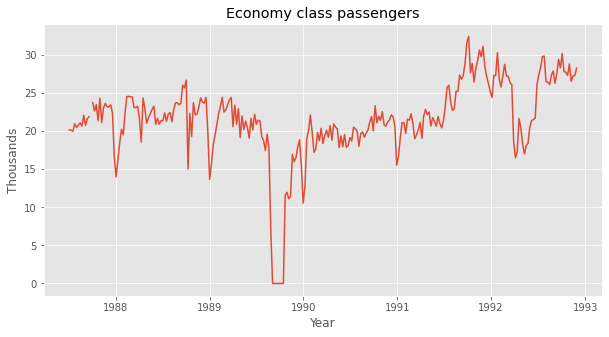

In [ ]:
#@title
# Download and prepare the data
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/melsyd.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='30/6/1987', end='30/11/1992', freq="w")
data.set_index(index, inplace=True)
# Plot the data
plt.figure(figsize=(10,5))
plt.plot(data["Economy.Class"])
plt.title('Economy class passengers')
plt.xlabel('Year')
plt.ylabel('Thousands')
plt.show()

The time plot reveals some interesting features.

- There was a period in 1989 when no passengers were carried (due to an industrial dispute).

- There was a period of reduced load in 1992 (due to a trial in which some economy class seats were replaced by business class seats).

- A large increase in passenger load occurred in the second half of 1991.

- There are some large dips in load around the start of each year. These are due to holiday effects.

- There is a long-term fluctuation in the level of the series which increases during 1987, decreases in 1989, and increases again through 1990 and 1991.

- There are some periods of missing observations.

Any model will need to take all these features into account in order to effectively forecast the passenger load into the future.

##  Time series patterns <a name="2.2"></a>

- **Trend**: It exists when there is a **long-term increase or decrease** in the data. It does not have to be linear. Sometimes we will refer to a trend as "changing direction" when it might go from an increasing trend to a decreasing trend. 

- **Seasonality**. A seasonal pattern occurs when a **time series is affected by seasonal factors** such as the time of the year or the day of the week. Seasonality is always of a **fixed and known frequency**. 

- **Cyclic**: A cycle occurs when the data exhibit **rises and falls that are not of a fixed frequency**. These fluctuations are usually due to economic conditions, and are often related to the "business cycle".

Cyclic and seasonal behavior are different. If the fluctuations are not of a fixed frequency then they are cyclic; if the frequency is unchanging and associated with some aspect of the calendar, then the pattern is seasonal. In general, the average length of cycles is longer than the length of a seasonal pattern, and the magnitudes of cycles tend to be more variable than the magnitudes of seasonal patterns.

Many time series include trend, cycles, and seasonality. **When choosing a forecasting method, we will first need to identify the time series patterns** in the data, **and then choose a method that is able to capture the patterns properly**.

The next figure shows four examples of time series showing different patterns.

![](https://otexts.com/fpp2/fpp_files/figure-html/fourexamples-1.png)

- The monthly housing sales (**top left**) show strong **seasonality** within each year, as well as some strong **cyclic** behavior with a period of about 6–10 years. There is **no** apparent **trend** in the data over this period.

- The US treasury bill contracts (**top right**) show results from the Chicago market for 100 consecutive trading days in 1981. Here there is **no seasonality**, but an obvious **downward trend**. Possibly, if we had a much longer series, we would see that this downward trend is actually part of a long cycle, but when viewed over only 100 days it appears to be a trend.

- The Australian quarterly electricity production (**bottom left**) shows a **strong increasing trend, with strong seasonality**. There is **no** evidence of any **cyclic behavior** here.

- The daily change in the Google closing stock price (**bottom right**) has **no trend, seasonality, or cyclic behavior**. There are **random fluctuations** which do **not** appear to be **very predictable**, and no strong patterns that would help with developing a forecasting model.

## Seasonal plots <a name="2.3"></a>

In this section, we are going to use the dataset of monthly anti-diabetic drug sales in Australia from 1991 to 2008.

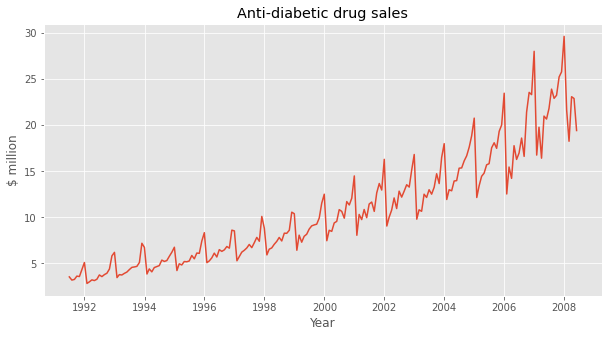

In [ ]:
#@title
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/a10.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='1991/06/1', end='2008/06/1', freq='M')
data.set_index(index, inplace=True)
plt.figure(figsize=(10,5))
plt.plot(data["value"])
plt.title('Anti-diabetic drug sales')
plt.xlabel('Year')
plt.ylabel('$ million')
plt.show()

There is a clear and **increasing trend**. There is also a **strong seasonal pattern that increases in size as the level of the series increases**. The sudden drop at the start of each year is caused by a government subsidization scheme that makes it cost-effective for patients to stockpile drugs at the end of the calendar year. Any forecasts of this series would need to capture the seasonal pattern and the fact that the trend is changing slowly.

A **seasonal plot** is similar to a time plot except that the **data are plotted against the individual "seasons"** in which the data were observed. It allows the underlying seasonal pattern to be seen more clearly and is useful in identifying years in which the pattern changes. An example is given below showing the antidiabetic drug sales.

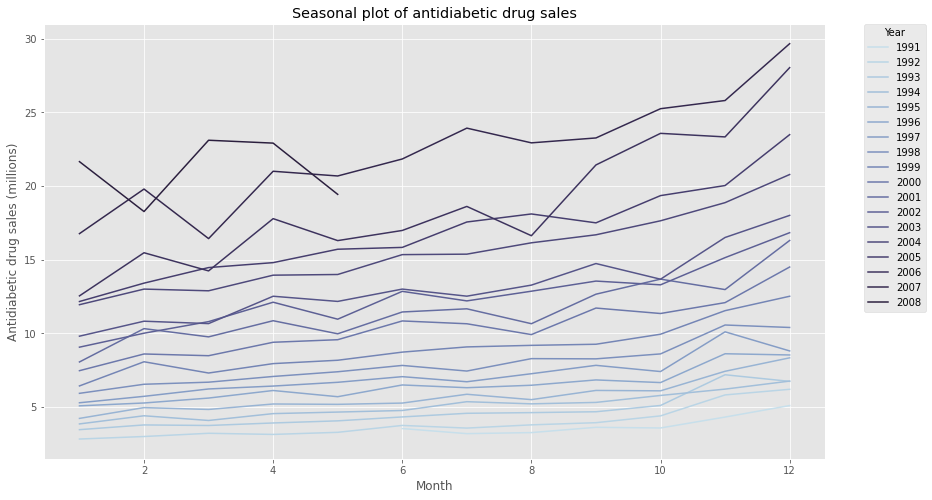

In [ ]:
#@title
plt.figure(figsize=(14,8))
palette = sns.color_palette(palette="ch:s=.25,rot=-.25", n_colors=18)
sns.lineplot(x=data.index.month, y=data["value"], hue=data.index.year, 
                  palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Year')
plt.title('Seasonal plot of antidiabetic drug sales')
plt.xlabel('Month')
plt.ylabel('Antidiabetic drug sales (millions)')
plt.show()

In this case, it is clear that there is a large jump in sales in December each year. The graph also shows that there was an unusually small number of sales in February 2008 (most other years show an increase between January and February). The small number of sales in May 2008 is probably due to incomplete counting of sales at the time the data were collected.

Another useful plot is the boxplot:

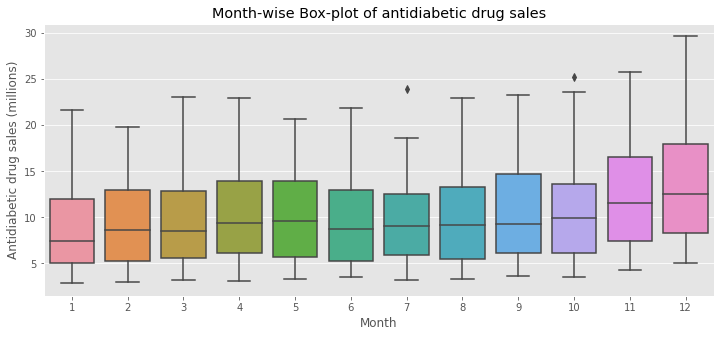

In [ ]:
#@title
plt.figure(figsize=(12,5))
sns.boxplot(x=data.index.month, y=data["value"])
plt.title('Month-wise Box-plot of antidiabetic drug sales')
plt.xlabel('Month')
plt.ylabel('Antidiabetic drug sales (millions)')
plt.show()

**Seasonal subseries plot**: An alternative plot that emphasizes the seasonal patterns is where the data for each season are collected together in separate mini time plots.

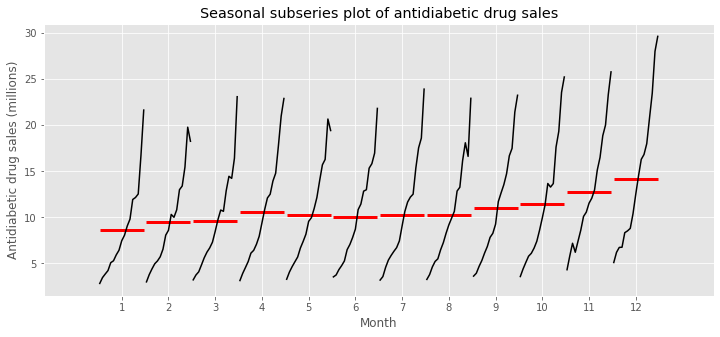

In [ ]:
#@title
import statsmodels.graphics.tsaplots as tsaplots

fig, ax = plt.subplots(1,1, figsize=(12,5))
_ = tsaplots.seasonal_plot(data['value'].groupby(data.index.month), list(range(1,13)), ax=ax)
plt.title('Seasonal subseries plot of antidiabetic drug sales')
plt.xlabel('Month')
plt.ylabel('Antidiabetic drug sales (millions)')
plt.show()

The horizontal lines indicate the means for each month. This form of plot enables the underlying seasonal pattern to be seen clearly, and also shows the changes in seasonality over time. It is especially useful in identifying changes within particular seasons.

## Scatterplots <a name="2.4"></a>

The graphs we used for visualizing individual time series are also useful to explore relationships between time series. They help us to **visualize the relationship between the variables**.

It is common to compute correlation coefficients to measure the strength of the linear relationship between two variables. A further explanation about correlation is available in this [notebook](https://nbviewer.jupyter.org/github/victorviro/Statistics-and-probability/blob/master/Statistical_hypothesis_tests_in_Python.ipynb#2.5).

When there are several potential predictor variables, it is useful to plot each variable against each other variable. These plots can be arranged in a scatterplot matrix that enables a quick view of the relationships between all pairs of variables.

Some examples are available [here](https://otexts.com/fpp2/scatterplots.html).

## Lag plots <a name="2.5"></a>

A lag plot is a **scatter plot for a time series and the same data lagged**. Each graph shows $y_t$ plotted against $y_{t-k}$ for different values of $k$. The next figure shows the quarterly Australian beer production dataset.

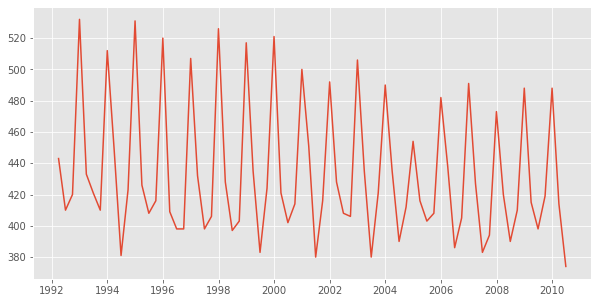

In [ ]:
#@title
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/ausbeer.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='1956/1/1', end='2010/07/1', freq="q")
data.set_index(index, inplace=True)
train_data = data["value"].loc["1992-1-1":]
plt.figure(figsize=(10,5))
plt.plot(train_data)
plt.show()

We observe a strong seasonality. Let's visualize the lag plots for the first 9 lags:

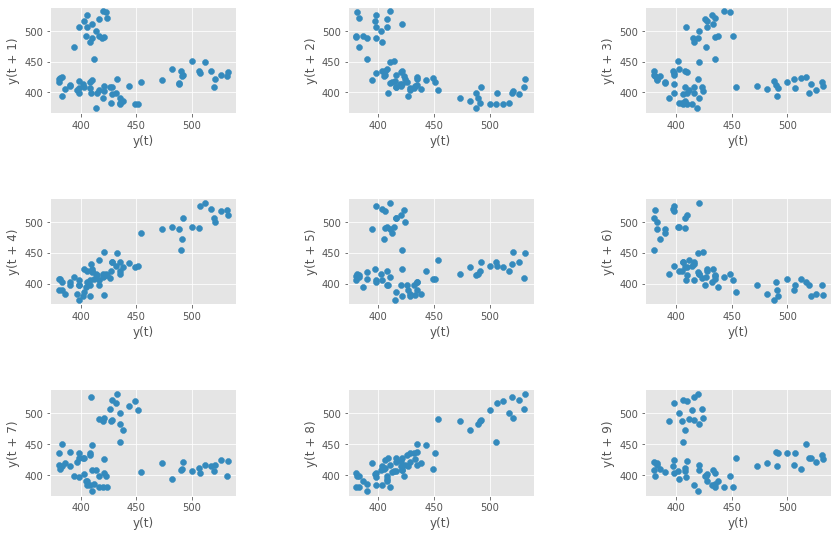

In [ ]:
#@title
fig, ax = plt.subplots(3, 3, figsize=(14, 9))
fig.subplots_adjust(hspace = .8, wspace=0.6)
ax = ax.ravel()
for index, lag in enumerate(range(1, 10)):
    pd.plotting.lag_plot(train_data, lag=lag, ax = ax[index])

The relationship is strongly positive at lags 4 and 8, reflecting the strong seasonality in the data.

## Autocorrelation <a name="2.6"></a>

Just as correlation measures the linear relationship between two variables, **autocorrelation measures the linear relationship between lagged values of a time series**. There are several autocorrelation coefficients, corresponding to each panel in the lag plot. For example, $r_1$ measures the relationship between $y_t$ and $y_{t-1}$, $r_2$ measures the relationship between $y_t$ and $y_{t-2}$, and so on. In general,

$$r_k=\frac{\sum_{t=k+1}^{T}(y_t-\bar{y})(y_{t-k}-\bar{y})}{\sum_{t=1}^{T}(y_t-\bar{y})^2}$$

where $T$ is the length of the time series.

The first nine autocorrelation coefficients for the beer production data correspond to the nine scatterplots in the previous figure (section "Lag plots"). The **autocorrelation coefficients** are **plotted** to show the **autocorrelation function or ACF**. The plot is also known as a **correlogram**.

We can use the [`plot_acf`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html) function of the statsmodels library to plot the ACF:

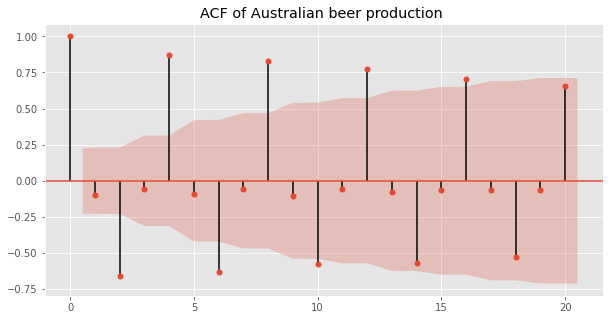

In [ ]:
#@title
import statsmodels.api as sm

data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/ausbeer.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='1956/1/1', end='2010/07/1', freq="q")
data.set_index(index, inplace=True)
train_data = data["value"].loc["1992-1-1":]

fig, ax = plt.subplots(1,1, figsize=(10,5))
_ = sm.graphics.tsa.plot_acf(train_data, lags=20, ax=ax)
plt.title('ACF of Australian beer production ')
plt.show()

In this graph:

- $r_4$ is higher than for the other lags. This is due to the seasonal pattern in the data: the peaks tend to be four quarters apart and the troughs tend to be four quarters apart.

- $r_2$ is more negative than for the other lags because troughs tend to be two quarters behind peaks.

- The red shaded area indicates whether the correlations are significantly different from zero.

**Trend and seasonality in ACF plots**

- When data have a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in size. So the ACF of trended time series tends to have positive values that slowly decrease as the lags increase.

- When data are seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal frequency) than for other lags.

- When data are both trended and seasonal, we see a combination of these effects. The monthly anti-diabetic drug sales series plotted below shows both trend and seasonality. Its ACF is also shown.

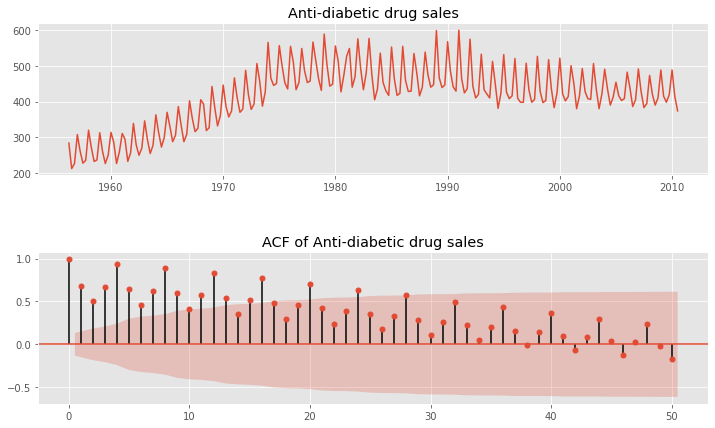

In [ ]:
#@title
fig, ax = plt.subplots(2,1, figsize=(12,7))
fig.subplots_adjust(hspace = .5)
ax[0].plot(data["value"])
ax[0].title.set_text('Anti-diabetic drug sales')
_ = sm.graphics.tsa.plot_acf(data["value"], lags=50, ax=ax[1])
ax[1].title.set_text('ACF of Anti-diabetic drug sales')

The slow decrease in the ACF as the lags increase is due to the trend, while the "scalloped" shape is due to the seasonality.

**White noise**

Time series that show **no autocorrelation** are called **white noise**. 

For white noise series, we expect each **autocorrelation to be close to zero**. Of course, they will not be exactly equal to zero as there is some random variation. For a white noise series, we expect 95% of the spikes in the ACF to lie within $\pm \frac{2}{\sqrt{T}}$ where $T$  is the length of the time series. It is common to plot these bounds on a graph of the ACF (the red shaded area). If one or more large spikes are outside these bounds, or if substantially more than 5% of spikes are outside these bounds, then the series is probably not white noise.

The next figure gives an example of a white noise series.

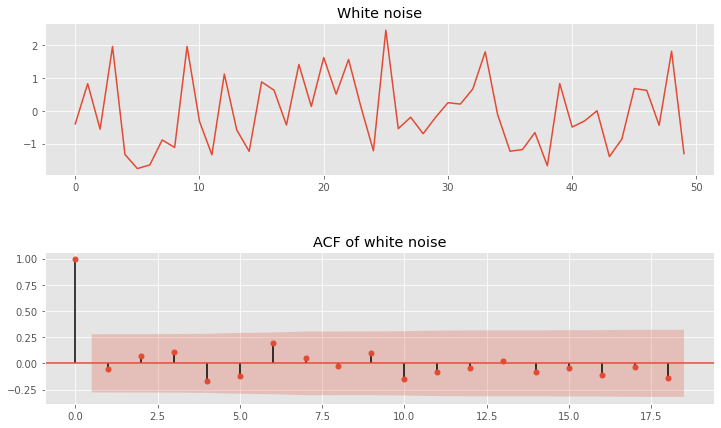

In [ ]:
#@title
white_noise = np.random.normal(size=50)
fig, ax = plt.subplots(2,1, figsize=(12,7))
fig.subplots_adjust(hspace = .5)
ax[0].plot(white_noise)
ax[0].title.set_text('White noise')
_ = sm.graphics.tsa.plot_acf(white_noise, lags=18, ax=ax[1])
ax[1].title.set_text('ACF of white noise')

In this example, $T=50$ and so the bounds are at $\pm \frac{2}{\sqrt{50}}=\pm 0.28$. All of the autocorrelation coefficients lie within these limits, confirming that the data are white noise.

In the section "ARIMA models: Non-seasonal ARIMA models", we will discuss a very related plot to show partial correlations (called PACF).

# Forecasting tools <a name="3"></a>

In this section, we discuss some general **tools** that are **useful for different forecasting situations**. We will describe some **benchmark forecasting methods**, ways of making the forecasting task simpler using **transformations and adjustments**, **methods for checking** whether a forecasting **method has adequately utilized the available information**, and techniques for computing prediction intervals.

## Simple forecasting methods <a name="3.1"></a>

Some forecasting methods are simple and effective. These methods may **serve as benchmarks** rather than the method of choice. That is, **any forecasting methods we develop will be compared to these simple methods to ensure that the new method is better than these simple alternatives**. If not, the new method is not worth considering.

**Average method**

Here, the forecasts of **all future values are equal to the average** (or "mean") **of the historical data**. If we let the historical data be denoted by $y_1,...,y_T$, then we can write the forecasts as

$$\hat{y}_{T+h|T}=\frac{1}{T}\sum_{t=1}^{T}y_t$$

$\hat{y}_{T+h|T}$ means the forecast of $y_{T+h}$ taking account of $y_1,...,y_T$.

**Naïve method**

For naïve forecasts, we simply set **all forecasts to be the value of the last observation**. That is,

$$\hat{y}_{T+h|T}=y_T$$

This method works remarkably well for many economic and financial time series. Because a naïve forecast is optimal when data follow a random walk, these are also called random walk forecasts.

**Seasonal naïve method**

A similar method is useful **for seasonal data**. In this case, we set **each forecast to be equal to the last observed value from the same season**. For example, with monthly data, the forecast for all future February values is equal to the last observed February value. With quarterly data, the forecast of all future Q2 values is equal to the last observed Q2 value (where Q2 means the second quarter). Similar rules apply for other months and quarters, and other seasonal periods.

**Drift method**

A variation on the naïve method is to allow the forecasts to increase or decrease over time, where the amount of change over time (called the drift) is set to be the average change seen in the historical data. Thus the forecast for time $T+h$ is given by

$$\hat{y}_{T+h|T}=y_T+h(\frac{y_T-y_1}{T-1})$$

This is equivalent to drawing a line between the first and last observations, and extrapolating it into the future.

**Example**

The next figure shows the first three methods applied to the quarterly beer production data.

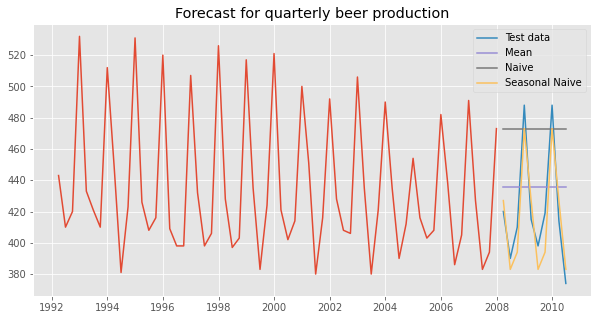

In [ ]:
#@title
# Download and prepare the data
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/ausbeer.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='1956/01/1', end='2010/07/1', freq='Q')
data.set_index(index, inplace=True)
# Set training data from 1992 to 2007
train_data = data.loc['1992/03/31':'2008/01/1','value']
test_data = data.loc['2008/01/1':,'value']

# Compute predictions
mean_prediction = pd.Series(
    data=np.full(shape=test_data.shape, fill_value=train_data.mean()),
    index=test_data.index
)
naive_prediction = pd.Series(
    data=np.full(shape=test_data.shape, fill_value=train_data[-1]),
    index=test_data.index
)
season_naive_prediction = pd.Series(
    data=np.tile(train_data[-4:], 3)[:test_data.shape[0]],
    index=test_data.index
)
# Plot the data and predictions
plt.figure(figsize=(10,5))
plt.plot(train_data)
plt.plot(test_data, label='Test data')
plt.plot(mean_prediction, label='Mean')
plt.plot(naive_prediction, label='Naive')
plt.plot(season_naive_prediction, label='Seasonal Naive')
plt.title('Forecast for quarterly beer production')
plt.legend(loc="upper right")
plt.show()

## Transformations and adjustments <a name="3.2"></a>

**Adjusting the data can** often **lead to a simpler forecasting task**. Here, we deal with two kinds of adjustments: calendar adjustments, and mathematical transformations. The purpose of these adjustments and transformations is to simplify the patterns in the historical data by removing known sources of variation or by making the pattern more consistent across the whole data set. Simpler patterns are usually easier to model and lead to more accurate forecasts.

**Calendar adjustments**

**Some of the variation in seasonal data may be due to calendar effects**. In such cases, it is usually easier to remove the variation before fitting a forecasting model. 

**For example**, if we are studying the monthly milk production on a farm, there will be **variation between the months simply because of the different numbers of days in each month**, in addition to the seasonal variation across the year:

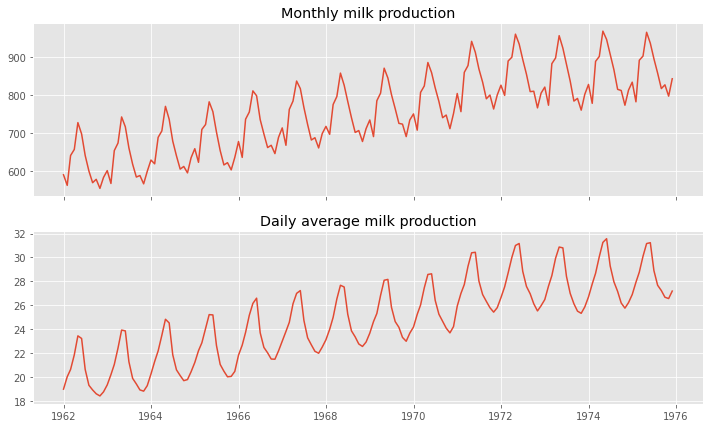

In [ ]:
#@title
data_url = ('https://raw.githubusercontent.com/plotly/datasets/master'
            '/monthly-milk-production-pounds.csv')
data = pd.read_csv(data_url, index_col=0, parse_dates=["Month"])
data.columns = ["production"]

fig, axs = plt.subplots(2, sharex=True, figsize=(12,7))
axs[0].plot(data["production"])
axs[0].title.set_text('Monthly milk production')
axs[1].plot(data["production"]/data.index.daysinmonth)
axs[1].title.set_text('Daily average milk production')

The seasonal pattern is simpler in the average daily production plot compared to the total monthly production plot. 

A similar adjustment can be done for sales data when the number of trading days in each month varies. In this case, the sales per trading day can be modeled instead of the total sales for each month.

**Mathematical transformations**

If the data show variation that increases or decreases with the level of the series, then a transformation can be useful. For example, a logarithmic transformation is often useful. If we denote the original observations as $y_1,...,y_T$ and the transformed observations as $w_1,...,w_T$, then  
$w_t=\text{log}(y_t)$. Logarithms are interpretable: changes in a log value are relative (or percentage) changes on the original scale. So if log base 10 is used, then an increase of 1 on the log scale corresponds to a multiplication of 10 on the original scale. Another useful feature of log transformations is that they constrain the forecasts to stay positive on the original scale.

Sometimes other transformations are also used (although they are not so interpretable). For example, square roots and cube roots can be used. These are called power transformations because they can be written in the form $w_t=y_t^p$.

A useful family of transformations, that includes both logarithms and power transformations, is the family of **Box-Cox transformations** (Box & Cox, 1964), which depend on the parameter $\lambda$ and are defined as follows:

$$
w_t=\begin{cases}
              \text{log}(y_t) & \text{if } \lambda = 0,\\
              (y_t^{\lambda}-1)/\lambda & \text{otherwise}.
\end{cases}
$$

If $\lambda=0$, natural logarithms are used, but if $\lambda \neq 0$, a power transformation is used, followed by some simple scaling.

If $\lambda=1$, then $w_t=y_t-1$, so the transformed data is shifted downwards but there is no change in the shape of the time series. But for all other values of $\lambda$, the time series will change shape.

Having chosen a transformation, we need to **forecast the transformed data**. Then, we need to **reverse the transformation** (or back-transform) **to obtain forecasts on the original scale**.

## Residual diagnostics <a name="3.3"></a>

The **fitted values**, denoted by $\hat{y}_{t|t-1}$, are the forecast of $y_t$ based on observations $y_1,...,t_{t-1}$. We sometimes drop part of the subscript and just write $\hat{y}_{t}$ instead of $\hat{y}_{t|t-1}$. Fitted values always involve one-step forecasts.

Actually, fitted values are often **not true forecasts** because any **parameters** involved in the forecasting method are **estimated using all available observations** in the time series, **including future observations**. For example, in the average method, the fitted values are the average computed over all observations (including those at times after $t$). On the other hand, naïve or seasonal naïve forecasts do not involve any parameters, and so fitted values are true forecasts in such cases.

The **residuals** are the **difference between the observations and the corresponding fitted values**:
$$e_t=y_t-\hat{y}_t$$

Residuals are **useful for checking whether a model has adequately captured the information in the data**. A good forecasting method will yield residuals with the following properties:

- The residuals are **uncorrelated**. If there are correlations, then there is information left in the residuals which should be used in computing forecasts.

- The residuals have **zero mean**. If the residuals have a mean other than zero, then the forecasts are biased.

Any forecasting method that does not satisfy these properties can be improved. Methods that satisfy these properties can be improved as well. Checking these properties is important in order **to see whether a method is using all of the available information, but it is not a good way to select a forecasting method**.

In addition to these properties, it is **useful (but not necessary)** for the residuals to also have the following **two properties**.

- The residuals have **constant variance**.
- The residuals are **normally distributed**.

These two properties make the calculation of prediction intervals easier. However, a forecasting method that does not satisfy these properties cannot necessarily be improved. Sometimes applying a Box-Cox transformation may assist with these properties, but otherwise, there is usually little that we can do to ensure that our residuals have constant variance and a normal distribution. Instead, an alternative approach to obtaining prediction intervals is necessary.

**Example**: Forecasting the Google daily closing stock price.

For stock market prices and indexes, the best forecasting method is often the naïve method. That is, each forecast is simply equal to the last observed value. Hence, the residuals are simply equal to the difference between consecutive observations. 

The following graphs show the Google daily closing stock price (GOOG), the residuals obtained from forecasting this series using the naïve method, the histogram of the residuals, and the AFC of the residuals.

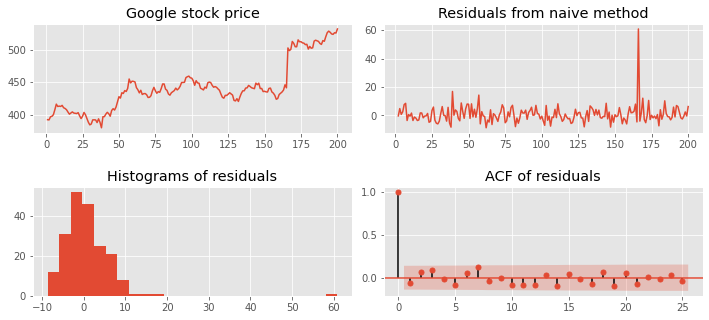

In [ ]:
#@title
import statsmodels.api as sm

data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/goog200.csv'
data = pd.read_csv(data_url, index_col=0)

fig, ax = plt.subplots(2,2, figsize=(12,5))
ax = ax.ravel()
fig.subplots_adjust(hspace = .5, wspace=.1)
ax[0].plot(data["value"])
ax[0].title.set_text('Google stock price')
residuals = data["value"].diff().dropna()
ax[1].plot(residuals)
ax[1].title.set_text('Residuals from naive method')
ax[2].hist(residuals, bins=25)
ax[2].title.set_text('Histograms of residuals')
_ = sm.graphics.tsa.plot_acf(residuals, lags=25, ax=ax[3])
ax[3].title.set_text('ACF of residuals')

These graphs show that the naïve method produces forecasts that appear to account for all available information. The mean of the residuals is close to zero and there is no significant correlation in the residuals series. The time plot of the residuals shows that the variation of the residuals stays much the same across the historical data, apart from the one outlier, and therefore the residual variance can be treated as constant. This can also be seen on the histogram of the residuals. The histogram suggests that the residuals may not be normal (the right tail seems a little too long, even when we ignore the outlier). Consequently, forecasts from this method will probably be quite good, but prediction intervals that are computed assuming a normal distribution may be inaccurate.

**Portmanteau tests for autocorrelation**

In addition to looking at the ACF plot, we can also do a more **formal test for autocorrelation** considering a whole set of $r_k$ values as a group, rather than treating each one separately.

We **test whether the first $h$ autocorrelations are significantly different from what would be expected from a white noise process**. A test for a group of autocorrelations is called a **portmanteau test**. 

One such test is the [**Ljung-Box test**](https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test), based on the following statistic

$$Q=T(T+2)\sum_{k=1}^{h}(T-k)^{-1}r_k^2$$

where $h$ is the maximum lag being considered and $T$ is the number of observations. If each $r_k$ is close to zero, then $Q$ will be small. If some $r_k$ values are large (positive or negative), then $Q$ will be large. So large values of $Q$ suggest that the autocorrelations do not come from a white noise series.

How large is too large? If the autocorrelations did come from a white noise series, then $Q$ would have a Chi-square distribution with $(h-K)$ degrees of freedom, where $K$ is the number of parameters in the model. If they are calculated from raw data (rather than the residuals from a model), then set $K=0$.

For the Google stock price example, the naïve model has no parameters, so $K=0$ in that case also.

In [ ]:
#@title
import statsmodels.api as sm

sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,11.031436,0.355074


The result is not significant (i.e., the p-value is relatively large). Thus, we can conclude that the residuals are not distinguishable from a white noise series.

## Evaluating forecast accuracy <a name="3.4"></a>

The **size of the residuals is not a reliable indication of how large true forecast errors are likely to be**. The accuracy of forecasts can only be determined by considering how well a model performs on **new data that were not used when fitting the model**.

In any supervised learning problem, we separate the available data into two portions, training and test data, where the training data is used to estimate any parameters of a method, and the test data is used to evaluate its accuracy. Because the **test data is not used in determining the predictions, it should provide a reliable indication of how well the model is likely to forecast on new data**.

- A model which fits the training data well will not necessarily forecast well.

- Over-fitting a model to data is just as bad as failing to identify a systematic pattern in the data.

**Subset a time series**. If the time series is stored in a Series object of Pandas we can use the index of the Series to subset a part of it.

**Forecast errors**

A forecast "error" is the **difference between an observed value and its forecast**. It means the unpredictable part of an observation. It can be written as

$$e_{T+h}=y_{T+h}-\hat{y}_{T+h|T}$$

where the training data is given by $y_1,...,y_T$ and the test data is given by $y_{T+1}, y_{T+2},...$

Forecast errors are **different from residuals**:

-  **Residuals are calculated on the training set while forecast errors are calculated on the test set**.

- **Residuals** are based on **one-step forecasts** while **forecast errors can involve multi-step forecasts**.

**Metrics**

We can measure forecast accuracy by using different metrics. The majority of the metrics we will mention are explained in this [notebook](https://nbviewer.jupyter.org/github/victorviro/Machine-Learning-Python/blob/master/ML_metrics_and_cost_functions.ipynb#Metrics-). 

- **Scale-dependent metrics**: The forecast errors are on the same scale as the data. Scale-dependent metrics are easy to interpret. The two most commonly used scale-dependent measures are Mean absolute error (MAE) and Root mean squared error (RMSE).

- **Percentage errors** have the advantage of being **unit-free**, and so are frequently used to compare forecast performances between data sets. The most commonly used metric is the Mean absolute percentage error (MAPE).

 These type of metrics has some disadvantages:
 - Infinite or undefined if $y_t=0$ for any $t$ in the period of interest.
 - Extreme values if any $y_t$ is close to zero.
 - Heavier penalty on negative errors than on positive errors. This observation led to the use of the so-called "symmetric" MAPE (sMAPE).

- **Scaled errors** as an alternative to using percentage errors when comparing forecast accuracy across series with different units.

**Example** The next table shows the metrics of the three methods (the first three methods explained in section "Simple forecasting methods") applied to the quarterly beer production data.

In [ ]:
#@title
from sklearn.metrics import (mean_squared_error, mean_absolute_error, 
                             mean_absolute_percentage_error)

# Download and prepare the data
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/ausbeer.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='1956/01/1', end='2010/07/1', freq='Q')
data.set_index(index, inplace=True)
# Set training data from 1992 to 2007
train_data = data.loc['1992/03/31':'2008/01/1','value']
test_data = data.loc['2008/01/1':,'value']

# Compute predictions
mean_prediction = pd.Series(
    data=np.full(shape=test_data.shape, fill_value=train_data.mean()),
    index=test_data.index
)
naive_prediction = pd.Series(
    data=np.full(shape=test_data.shape, fill_value=train_data[-1]),
    index=test_data.index
)
season_naive_prediction = pd.Series(
    data=np.tile(train_data[-4:], 3)[:test_data.shape[0]],
    index=test_data.index
)
# Compute metrics
method_predictions = [mean_prediction, naive_prediction, season_naive_prediction]
rmses, maes, mapes = [], [], []
for method_prediction in method_predictions[0:4]:
    rmse = np.sqrt(mean_squared_error(test_data, method_prediction))
    rmses.append(rmse)
    maes.append(mean_absolute_error(test_data, method_prediction))
    mapes.append(mean_absolute_percentage_error(test_data, method_prediction))

metric_values = pd.DataFrame(data={
    "RMSE": rmses,
    "MAE": maes,
    "MAPE": mapes
    },
    index = ["Mean method", "Naive method", "Seasonal naive method"]
)
metric_values.round(2)

,RMSE,MAE,MAPE
Mean method,38.45,34.83,0.08
Naive method,62.69,57.40,0.14
Seasonal naive method,14.31,13.40,0.03


From the graph we visualized in the previous section it is obvious  that the seasonal naïve method is best for these data, although it can still be improved. Sometimes, different accuracy measures will lead to different results as to which forecast method is best. However, in this case, all of the results point to the seasonal naïve method as the best of these three methods for this data set.

**Time series cross-validation**

A more sophisticated version of training/test sets is time series cross-validation. In this procedure, there are **a series of test sets, each consisting of a single observation**. The corresponding **training set consists only of observations that occurred prior to the observation that forms the test set**. Thus, no future observations can be used in constructing the forecast. Since it is not possible to obtain a reliable forecast based on a small training set, the earliest observations are not considered as test sets.

The following diagram illustrates the series of training and test sets, where the blue observations form the training sets, and the red observations form the test sets.

![](https://otexts.com/fpp2/fpp_files/figure-html/cv1-1.png)

The forecast accuracy is computed by averaging over the test sets.

With time series forecasting, one-step forecasts may not be as relevant as multi-step forecasts. In this case, the **cross-validation procedure can be modified to allow multi-step errors** to be used.

## Prediction intervals <a name="3.5"></a>

A prediction interval gives an **interval within which we expect $y_t$ to lie with a specified probability**. For example, assuming that the forecast errors are normally distributed, a 95% prediction interval for the $h$-step forecast is 

$$\hat{y}_{T+h|T} \pm1.96\hat{\sigma}_h$$

where $\hat{\sigma}_h$ is an estimate of the standard deviation of the $h$-step forecast distribution.

More generally, a prediction interval can be written as

$$\hat{y}_{T+h|T} \pm c\hat{\sigma}_h$$
 
where the multiplier $c$ depends on the coverage probability. We usually calculate 80% intervals and 95% intervals, although any percentage may be used.

The value of **prediction intervals** is that they **express the uncertainty in the forecasts**. If we only produce point forecasts, there is no way of telling **how accurate the forecasts are**. However, if we also produce prediction intervals, then it is clear **how much uncertainty is associated with each forecast**. For this reason, point forecasts can be of almost no value without the accompanying prediction intervals.

**One-step prediction intervals**

When forecasting one step ahead, the **standard deviation of the forecast distribution is almost the same as the standard deviation of the residuals**.

For example, consider a naïve forecast for the Google stock price data (shown in section "Residual diagnostics"). The last value of the observed series is 531.48, so the forecast of the next value of the GSP is 531.48. The standard deviation of the residuals from the naïve method is 6.21. Hence, a 95% prediction interval for the next value of the GSP is

$$531.48 \pm1.96(6.21)=[519.3, 543.6]$$

**Multi-step prediction intervals**

Prediction intervals increase in length as the forecast horizon increases. The further ahead we forecast, the more uncertainty is associated with the forecast, and thus the wider the prediction intervals. That is, $\sigma_h$ usually increases with $h$ (although there are some non-linear forecasting methods that do not have this property).

To produce a prediction interval, it is necessary to have an estimate of $\sigma_h$. As already noted, for one-step forecasts ($h=1$), the residual standard deviation provides a good estimate of the forecast standard deviation $\sigma_1$. For multi-step forecasts, a more complicated method of calculation is required. These calculations assume that the residuals are uncorrelated.

For the four benchmark methods, it is possible to mathematically derive the forecast standard deviation under the assumption of uncorrelated residuals. If $\hat{\sigma}_h$ denotes the standard deviation of the $h$-step forecast distribution, and $\hat{\sigma}$ is the residual standard deviation, then we can use the following expressions.

- Mean forecasts: $\hat{\sigma}_h=\hat{\sigma}\sqrt{1+\frac{1}{T}}$

- Naive forecasts: $\hat{\sigma}_h=\hat{\sigma}\sqrt{h}$

- Seasonal naive forecasts: $\hat{\sigma}_h=\hat{\sigma}\sqrt{k+1}$, where $k$ is the integer part of $\frac{h-1}{m}$, and $m$ is the seasonal period.

- Drift forecasts: $\hat{\sigma}_h=\hat{\sigma}\sqrt{h(1+\frac{1}{T})}$

Note that when $h=1$ and $T$  is large, these all give the same approximate value $\hat{\sigma}$.

**Notes**:

- **When a normal distribution for the forecast errors is an unreasonable assumption**, one alternative is to use **bootstrapping**, which only assumes that the forecast errors are uncorrelated.

- If a **transformation** has been used, then the **prediction interval should be computed on the transformed scale**, and the end points back-transformed to give a prediction interval on the original scale. 

# Time series decomposition <a name="4"></a>

**Time series data can exhibit a variety of patterns**, and it is helpful to **split a time series into several components, each representing an underlying pattern**.

We have already discussed three types of time series patterns: **trend, seasonality, and cycles**. When we decompose a time series into components, **we usually combine the trend and cycle into a single trend-cycle component** (sometimes called the trend for simplicity). Thus we think of a time series as comprising **three components: a trend-cycle component, a seasonal component, and a remainder component** (containing anything else in the time series).

We are going to consider some common methods for extracting these components from a time series. Often this is done to help improve understanding of the time series, but it can also be used to improve forecast accuracy.

## Time series components <a name="4.1"></a>

If we assume an additive decomposition, then we can write

$$y_t=S_t+T_t+R_t$$

where

- $y_t$ is the data at period $t$,
- $S_t$ is the seasonal component at period $t$,
- $T_t$ is the trend-cycle component at period $t$, and  
- $R_t$ is the remainder component at period $t$

Alternatively, a multiplicative decomposition would be written as 

$$y_t=S_t \times T_t \times R_t$$

- The **additive decomposition** is the most **appropriate** if the **magnitude of the seasonal** fluctuations, or the variation around the trend-cycle, **does not vary with the level of the time series** (are relatively constant over time). 

- When the **variation in the seasonal** pattern, or the variation around the trend-cycle, appears to be **proportional to the level of the time series (or change over time), then a multiplicative decomposition is more appropriate**. Multiplicative decompositions are common with economic time series.

An alternative to using a multiplicative decomposition is to first transform the data until the variation in the series appears to be stable over time, then use an additive decomposition.

**Example**: We will look at several methods for obtaining the components later in this section, but first, let's see an example. We will decompose the new orders index for electrical equipment. The data show the number of new orders for electrical equipment in the Euro area.

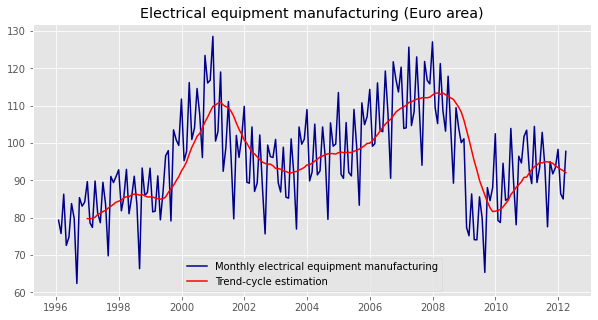

In [ ]:
#@title
# Download and prepare the data
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/elecequip.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='1/1/1996', end='31/03/2012', freq="M")
data.set_index(index, inplace=True)
# Plot the series and an estimate of the trend-cycle
rolling_average = data['value'].rolling(12, center=False).mean()
plt.figure(figsize=(10,5))
plt.plot(data['value'], color='darkblue', 
         label='Monthly electrical equipment manufacturing')
plt.plot(rolling_average, color='red', label='Trend-cycle estimation')
plt.legend(loc='best')
plt.title('Electrical equipment manufacturing (Euro area)')
plt.show(block=False)

The previous figure shows the trend-cycle component, $T_t$, in red and the original data, $y_t$, in blue. The trend-cycle shows the overall movement in the series, ignoring the seasonality and any small random fluctuations.

The next figure shows an additive decomposition of these data. The method used for estimating components in this example is moving averages, which is discussed later in this section. We use the [`seasonal_decompose`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) method of the statsmodels library to perform the decomposition.

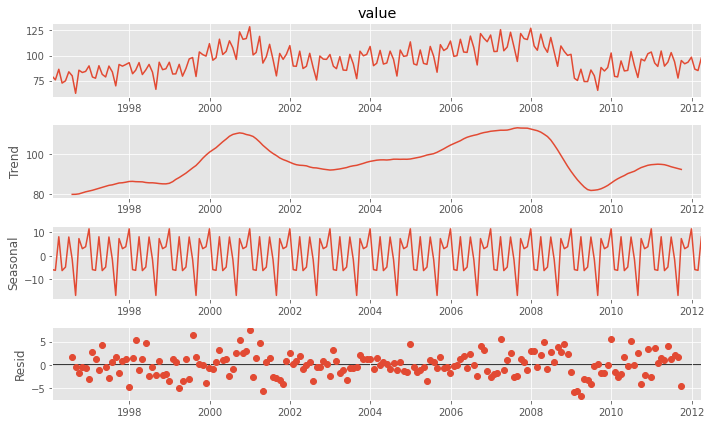

In [ ]:
#@title
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_trends = seasonal_decompose(
    x=data['value'],
    model='additive', 
    period=12
)
plt.rc("figure", figsize=(10,6))
trend_plot = decomposed_trends.plot()

The three components are shown separately in the bottom three panels of the figure. The seasonal component changes slowly over time, so that any two consecutive years have similar patterns, but years far apart may have different seasonal patterns. The remainder component shown in the bottom panel is what is left over when the seasonal and trend-cycle components have been subtracted from the data.

**Seasonally adjusted data**

If the **seasonal component is removed** from the original data, the resulting values are the **"seasonally adjusted" data**. For an additive decomposition, the seasonally adjusted data are given by $y_t-S_t$, and for multiplicative data, the seasonally adjusted values are obtained using $y_t/S_t$.

The next figure shows the seasonally adjusted electrical equipment orders.

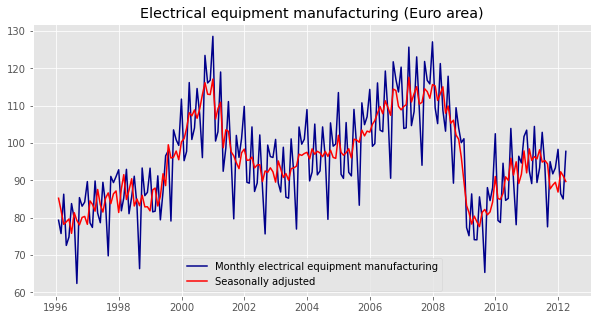

In [ ]:
#@title
seasonally_adjusted = data['value']-decomposed_trends.seasonal
plt.figure(figsize=(10,5))
plt.plot(data['value'], color='darkblue', 
         label='Monthly electrical equipment manufacturing')
plt.plot(seasonally_adjusted, color='red', label='Seasonally adjusted')
plt.legend(loc='best')
plt.title('Electrical equipment manufacturing (Euro area)')
plt.show(block=False)

If the variation due to seasonality is not of primary interest, the seasonally adjusted series can be useful. For example, monthly unemployment data are usually seasonally adjusted in order to highlight variation due to the underlying state of the economy rather than the seasonal variation. An increase in unemployment due to school leavers seeking work is seasonal variation, while an increase in unemployment due to an economic recession is non-seasonal. Most economic analysts who study unemployment data are more interested in the non-seasonal variation. Consequently, employment data (and many other economic series) are usually seasonally adjusted.

Seasonally adjusted series contain the remainder component as well as the trend-cycle. Therefore, they are not "smooth", and "downturns" or "upturns" can be misleading. If the purpose is to look for turning points in a series, and interpret any changes in direction, then it is better to use the trend-cycle component rather than the seasonally adjusted data.

## Moving averages <a name="4.2"></a>

The first step in a classical decomposition is to use a **moving average method to estimate the trend-cycle**.

**Moving average smoothing**

A moving average of order $m$ can be written as
$$\hat{T}_t = \frac{1}{m}\sum_{j=-k}^{k}y_{t+j}$$
 
where $m=2k+1$. That is, the **estimate of the trend-cycle** at time $t$ is **obtained by averaging values of the time series within $k$ periods** of $t$. Observations that are nearby in time are also likely to be close in value. Therefore, the average **eliminates some of the randomness in the data, leaving a smooth trend-cycle component**. We call this an $m$-MA, meaning a moving average of order $m$.

For example, let's perform a moving average of order 5 in the series of electricity volume sold to customers in Australia each year from 1989 to 2008. Each value in the 5-MA moving average is the average of the observations in the five-year window centered on the corresponding year. There are no values for either the first two years or the last two years because we do not have two observations on either side.

We can use the [`rolling`](https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html) method of the pandas Series object to create centered windows in the series and then compute the mean.

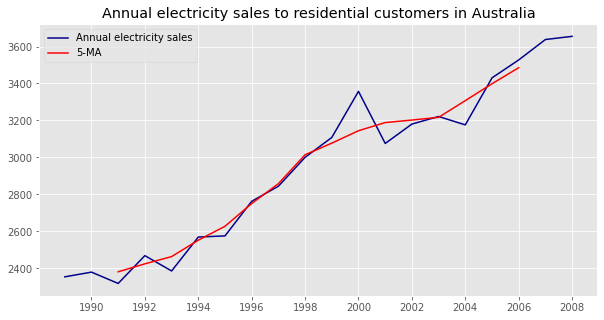

In [ ]:
#@title
# Download and prepare the data
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/elecsales.csv'
data = pd.read_csv(data_url, index_col=0, parse_dates=["time"])
data.set_index("time", inplace=True)
# Compute the 5-MA and plot the series
rolling_average = data['value'].rolling(5, center=True).mean()
plt.figure(figsize=(10,5))
plt.plot(data['value'], color='darkblue', 
         label='Annual electricity sales')
plt.plot(rolling_average, color='red', label='5-MA')
plt.legend(loc='best')
plt.title('Annual electricity sales to residential customers in Australia')
plt.show(block=False)

The **trend-cycle** (in red) is **smoother** than the original data and **captures the main movement of the time series** without all of the minor fluctuations. The **order** of the moving average **determines the smoothness of the trend-cycle estimate**. In general, a **larger order means a smoother curve**. The next figure shows the effect of changing the order of the moving average for the residential electricity sales data.

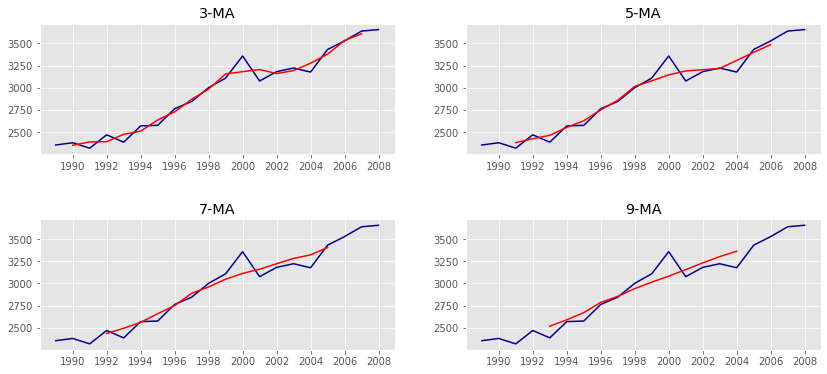

In [ ]:
#@title
fig, ax = plt.subplots(2, 2, figsize=(14, 6))
fig.subplots_adjust(hspace = .5)
ax = ax.ravel()
for index, order in enumerate([3, 5, 7, 9]):
    ma = data['value'].rolling(order, center=True).mean()
    ax[index].plot(data['value'], color='darkblue')
    ax[index].plot(ma, color='red', label=f'{order}-MA')
    ax[index].title.set_text(f'{order}-MA')

Simple moving averages such as these are usually of an odd order (e.g., 3, 5, 7, etc.). This is so they are symmetric.

**Moving averages of moving averages**: It is possible to **apply a moving average to a moving average**. One reason for doing this is to make an even-order moving average symmetric. For example, we might take a moving average of order 4, and then apply another moving average of order 2 to the results. This would be a $2 \times 4$-MA, meaning a $4$-MA followed by a $2$-MA. When a 2-MA follows a moving average of an even order (such as 4), it is called a "centered moving average of order 4". This is because the results are now symmetric. Other combinations of moving averages are also possible. For example, a $3 \times 3$-MA is often used. In general, an even order MA should be followed by an even order MA to make it symmetric. Similarly, an odd order MA should be followed by an odd order MA. The most **common use of centered moving averages is for estimating the trend-cycle from seasonal data**.

**Weighted moving averages**

Combinations of moving averages result in weighted moving averages. For example, the $2 \times 4$-MA discussed above is equivalent to a weighted $5$-MA with weights given by $[\frac{1}{8}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{8}]$.

In general, a weighted $m$-MA can be written as

$$\hat{T}_t=\sum_{j=-k}^{k}a_jy_{t+j}$$

where $k=\frac{(m-1)}{2}$ and the weights are given by $a_{-k},...,a_{k}$. It is important that the weights all sum to one and that they are symmetric so that $a_j=a_{-j}$. The simple $m$-MA is a special case where all of the weights are equal to $\frac{1}{m}$.

A major advantage of **weighted moving averages** is that they **yield a smoother estimate of the trend-cycle**. Instead of observations entering and leaving the calculation at full weight, their weights slowly increase and then slowly decrease, resulting in a smoother curve.

## Classical decomposition <a name="4.3"></a>

There are **two forms** of classical decomposition: an **additive** decomposition **and multiplicative** decomposition. These are described below for a time series with seasonal period $m$ (e.g., $m=4$ for quarterly data, $m=12$ for monthly data, $m=7$ for daily data with a weekly pattern).

In classical decomposition, we assume that the seasonal component is constant from year to year.

**Steps for additive decomposition (and multiplicative)**

1. If $m$ is an even number, **compute the trend-cycle component** $\hat{T_t}$ using a $2 \times m$-MA. If $m$ is an odd number, compute the trend-cycle component using an $m$-MA.

2. **Calculate the detrended series**: $y_t-\hat{T_t}$ (for multiplicative decomposition $\frac{y_t}{\hat{T_t}}$).

3. To **estimate the seasonal component** for each season, simply average the detrended values for that season. For example, with monthly data, the seasonal component for March is the average of all the detrended March values in the data. These seasonal component values are then adjusted to ensure that they add to zero. The seasonal component is obtained by stringing together these monthly values and then replicating the sequence for each year of data. This gives $\hat{S_t}$.

4. The **remainder component** is calculated by subtracting the estimated seasonal and trend-cycle components:  $\hat{R_t}=y_t-\hat{T_t}-\hat{S_t}$ (for multiplicative decomposition $\frac{y_t}{\hat{T_t}\hat{S_t}}$).

The next figure (produced in the section "Time series components") shows a classical decomposition of the electrical equipment index.

![](https://i.ibb.co/RQqz9kK/time-series-classical-decomposition.png)

The run of remainder values in 2009 suggests that there is some “leakage” of the trend-cycle component into the remainder component. The trend-cycle estimate has over-smoothed the drop in the data, and the corresponding remainder values have been affected by the poor trend-cycle estimate.


**Note**: **Classical decomposition** is still widely used, but it **is not recommended**, as **there are** now **better methods**. Some of the **problems** with classical decomposition are summarised below.

- The **estimate of the trend-cycle is unavailable for the first few and last few observations**. Consequently, there is also no estimate of the remainder component for the same time periods.

- The **trend-cycle** estimate tends to **over-smooth** rapid rises and falls in the data (as seen in the above example).

- It **assumes** that the **seasonal component repeats from year to year**. For many series, this is a reasonable assumption, but for some longer series, it is not. For example, electricity demand patterns have changed over time as air conditioning has become more widespread. Specifically, in many locations, the seasonal usage pattern from several decades ago had its maximum demand in winter (due to heating), while the current seasonal pattern has its maximum demand in summer (due to air conditioning). The classical decomposition methods are unable to capture these seasonal changes over time.

- Occasionally, the values of the time series in a small number of periods may be particularly unusual. For example, the monthly air passenger traffic may be affected by an industrial dispute, making the traffic during the dispute different from usual. The classical method is not robust to these kinds of unusual values.

## Other decompositions methods <a name="4.4"></a>

**X11 decomposition**

A method for decomposing quarterly and monthly data is the **X11 decomposition**. It is **based on classical decomposition**, but **includes** extra **steps** and features in order **to overcome the drawbacks of classical decomposition**. In particular, trend-cycle estimates are available for all observations including the end points, and the seasonal component is allowed to vary slowly over time. X11 also has some sophisticated methods for handling trading day variation, holiday effects, and the effects of known predictors. It handles both additive and multiplicative decomposition. The process is entirely automatic and tends to be highly **robust to outliers** and level shifts in the time series. The details of the X11 method are described in the book "Seasonal adjustment methods and real-time trend-cycle estimation".

**SEATS**

"SEATS" stands for "Seasonal Extraction in ARIMA Time Series" (ARIMA models are discussed in a following section). The procedure **works only with quarterly and monthly data**. So seasonality of other kinds, such as daily, hourly or weekly data, require an alternative approach. A complete discussion of the method is available in the book "Seasonal adjustment methods and real-time trend-cycle estimation".

**STL**

STL is a versatile and robust method for decomposing time series. It's an acronym for "Seasonal and Trend decomposition using Loess" (Loess is a method for estimating nonlinear relationships). STL has several** advantages** over the classical, SEATS, and X11 decomposition methods:

- Unlike SEATS and X11, STL will **handle any type of seasonality**, not only monthly and quarterly data.

- The **seasonal component is allowed to change over time**, and the rate of change can be controlled by the user.

- The **smoothness of the trend-cycle** can also be **controlled by the user**.

- It can be **robust to outliers** (i.e., the user can specify a robust decomposition), so that occasional unusual observations will not affect the estimates of the trend-cycle and seasonal components. They will, however, affect the remainder component.

On the other hand, STL has some **disadvantages**. In particular, it **does not handle trading day or calendar variation** automatically, and it **only** provides facilities **for additive decompositions**.

It is possible to obtain a multiplicative decomposition by first taking logs of the data, then back-transforming the components. Decompositions between additive and multiplicative can be obtained using a Box-Cox transformation of the data with $0< \lambda < 1$ . A value of $\lambda=0$ corresponds to the multiplicative decomposition while $\lambda=1$ is equivalent to an additive decomposition.

Let's apply the STL decomposition to the electrical equipment orders data. 

We can use the [`STL`](https://www.statsmodels.org/devel/generated/statsmodels.tsa.seasonal.STL.html) function of the statsmodels library to apply the STL decomposition.

The next figure shows a STL decomposition where the trend-cycle is flexible, the seasonal component does not change over time, and the robust option has been used. It is obvious that there has been a down-turn at the end of the series, and that the orders in 2009 were unusually low (corresponding to some large negative values in the remainder component).

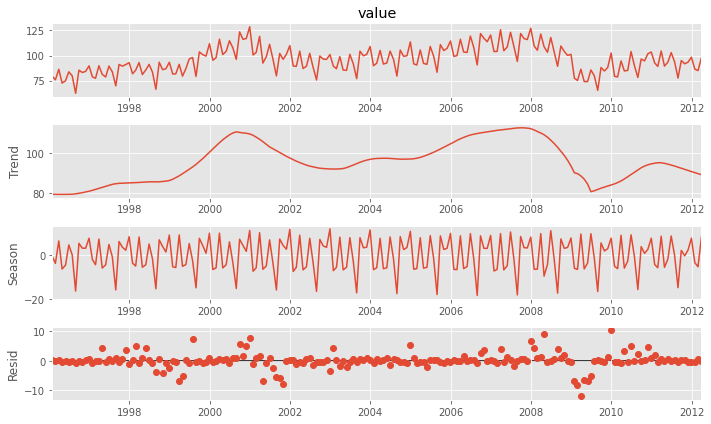

In [ ]:
#@title
from statsmodels.tsa.seasonal import STL

# Download and prepare the data
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/elecequip.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='1/1/1996', end='31/03/2012', freq="M")
data.set_index(index, inplace=True)
# Apply STL decomposition
stl_decomposition = STL(data["value"], trend=13, robust=True).fit()
plt.rc("figure", figsize=(10,6))
stl_decomposition.plot()
plt.show()

The two main parameters to be chosen when using STL are the trend-cycle window (`trend`) and the seasonal window (`seasonal`). These **control how rapidly the trend-cycle and seasonal components can change**. Smaller values allow for more rapid changes. Both parameters should be odd numbers; `trend` is the number of consecutive observations to be used when estimating the trend-cycle; `seasonal` is the number of consecutive years to be used in estimating each value in the seasonal component.

As with the other decomposition methods discussed, the separate components plotted in the previous figure are available as attributes of the object created (`stl_decomposition`).

**Forecasting with decomposition**. While decomposition is primarily useful for studying time series data, and exploring historical changes over time, it can also be used in forecasting. More details are available [here](https://otexts.com/fpp2/forecasting-decomposition.html).

**Measuring strength of trend and seasonality**

A time series **decomposition can be used to measure the strength of trend and seasonality in a time series**. If we assume an additive decomposition, then we can write

$$y_t=S_t+T_t+R_t$$

where

- $y_t$ is the data at period $t$,
- $S_t$ is the seasonal component at period $t$,
- $T_t$ is the trend-cycle component at period $t$, and  
- $R_t$ is the remainder component at period $t$

For strongly trended data, the seasonally adjusted data should have much more variation than the remainder component. Therefore $\frac{\text{Var}(R_t)}{\text{Var}(T_t+R_t)}$ should be relatively small. But for data with little or no trend, the two variances should be approximately the same. So we define the **strength of trend** as:

$$F_T=\max{(0, 1-\frac{\text{Var}(R_t)}{\text{Var}(T_t+R_t)})}$$

This will give a measure of the strength of the trend **between 0 and 1**. Because the variance of the remainder might occasionally be even larger than the variance of the seasonally adjusted data, we set the minimal possible value of $F_T$ equal to zero.

The **strength of seasonality** is defined similarly, but with respect to the detrended data rather than the seasonally adjusted data:

$$F_S=\max{(0, 1-\frac{\text{Var}(R_t)}{\text{Var}(S_t+R_t)})}$$

A series with seasonal strength $F_S$ close to 0 exhibits almost no seasonality, while a series with strong seasonality will have $F_S$ close to 1 because $\text{Var}(R_t)$ will be much smaller than $\text{Var}(S_t+R_t)$.

These measures can be useful, for example, when we have a large collection of time series, and we need to find the series with the most trend or the most seasonality.

# Exponential smoothing <a name="5"></a>

Forecasts produced using exponential smoothing methods are **weighted averages of past observations**, with the **weights decaying exponentially as the observations get older**. That is, the more recent the observation the higher the associated weight. It generates reliable forecasts quickly and for a wide range of time series, which is a great advantage to applications in the industry.

We first present the most important **exponential smoothing methods**. The selection of the method is generally **based on recognizing key components of the time series (trend and seasonality) and the way in which these enter the smoothing method (e.g., in an additive, damped, or multiplicative manner)**.

Finally, we'll present statistical models that underlie exponential smoothing methods. These models generate identical forecasts to the methods discussed previously, but also generate prediction intervals. Furthermore, this statistical framework allows for genuine model selection between competing models.

## Simple exponential smoothing <a name="5.1"></a>

This method is suitable for forecasting **data with no** **clear trend or seasonal pattern**.

Using the **naïve method**, all forecasts for the future are equal to the **last observed value** of the series. Hence, it assumes that the most recent observation is the only important one, and all previous observations provide no information. This can be thought of as a weighted average where all of the weight is given to the last observation.

Using the **average method**, all future forecasts are equal to a simple **average of the observed data**. Hence, the average method assumes that all observations are of equal importance, and gives them equal weights when generating forecasts.

We often want **something between these two extremes**. For example, it may make sense to attach **larger weights to more recent observations than to observations from the distant past**. This is the concept behind simple exponential smoothing. Forecasts are calculated using weighted averages, where the **weights decrease exponentially as observations come from further in the past** (the smallest weights are associated with the oldest observations):

$$\hat{y}_{T+1|T}=\alpha y_T + \alpha(1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-2}+ ...$$

where $0\leq \alpha \leq 1$ is the **smoothing parameter** (the rate at which the weights decrease). The one-step-ahead forecast for time $T+1$ is a weighted average of all of the observations in the series $y_1,...,y_T$.

If $\alpha$ is small (i.e., close to 0), more weight is given to observations from the more distant past. If  $\alpha$ is large (i.e., close to 1), more weight is given to the more recent observations. For the extreme case where $\alpha=1$,
$\hat{y}_{T+h|T}=y_T$, and the forecasts are equal to the naïve forecasts.

Let's see two equivalent forms of simple exponential smoothing:

- **Weighted average form**: The forecast at time $T+1$ is equal to a weighted average between the most recent observation $y_T$  and the previous forecast $\hat{y}_{T|T-1}$:

 $$\hat{y}_{T+1|t}=\alpha y_T + (1-\alpha)\hat{y}_{T|T-1}$$

  Similarly, we can write the fitted values (the one-step forecasts of the training data) as

   $$\hat{y}_{t+1|t}=\alpha y_t + (1-\alpha)\hat{y}_{t|t-1}$$

  Substituting we can obtain the initial forecast equation. 

- An alternative representation is the **component form**. For simple exponential smoothing, the only component included is the level, $l_t$ (other methods which are considered later may also include a trend $b_t$ and a seasonal component $s_t$). Component form representations of exponential smoothing methods comprise a **forecast equation and a smoothing equation**. The component form of simple exponential smoothing is:

 $$\hat{y}_{t+h|t}=l_t$$
 $$l_t=\alpha y_t + (1-\alpha)l_{t-1}$$

  where $l_t$ is the level (or the smoothed value) of the series at time $t$. Setting $h=1$ and $t=0,...,T-1$ gives the fitted values, while setting $t=T$ gives the true forecasts beyond the training data.

Simple exponential smoothing has a **"flat" forecast function**:

$$\hat{y}_{T+h|T}=l_T$$

for $h=1,2,...$. That is, **all forecasts (beyond the training data) take the same value, equal to the last level component**.

For simple exponential smoothing, we need to select the values of $\alpha$ and $l_o$. In some cases, $\alpha$ may be chosen subjectively (based on our previous experience), but we can estimate them from the observed data (by minimizing the sum of square errors using an optimization algorithm).
 
**Example**. We are going to apply a simple exponential smoothing to forecast annual oil production in Saudi Arabia.

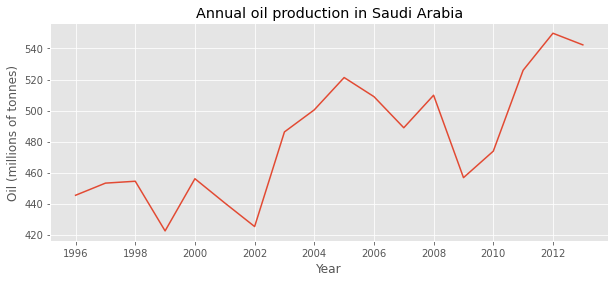

In [ ]:
#@title
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/oil.csv'
data = pd.read_csv(data_url, index_col=0, parse_dates=["time"])
data.set_index("time", inplace=True)
train_data = data["value"].loc["1996":]
plt.figure(figsize=(10,4))
plt.plot(train_data)
plt.title('Annual oil production in Saudi Arabia')
plt.xlabel('Year')
plt.ylabel('Oil (millions of tonnes)')
plt.show()

The data do **not** display any clear **trending or seasonality** behavior (there is a rise in the last few years, which might suggest a trend).

The [`SimpleExpSmoothing`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html) method of the statsmodels library provides an implementation of this method. We can explicitly provide the model with the $\alpha$ and $l_0$ values but we let statsmodels to automatically find optimized values.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


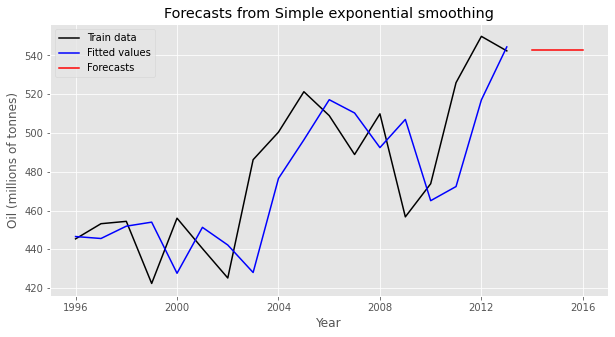

In [ ]:
#@title
from statsmodels.tsa.api import SimpleExpSmoothing

fit = SimpleExpSmoothing(
    endog=train_data, 
    initialization_method="estimated"
).fit()

forecast = fit.forecast(3)

plt.figure(figsize=(10, 5))
plt.plot(train_data, color='black', label='Train data') #, marker='o'
plt.plot(fit.fittedvalues, color='blue', label='Fitted values')
plt.plot(forecast, color='red', label='Forecasts')
plt.legend()
plt.title('Forecasts from Simple exponential smoothing')
plt.xlabel('Year')
plt.ylabel('Oil (millions of tonnes)')
plt.show()

The forecasts for the period 2014–2017 are plotted in red. The one-step-ahead fitted values (in blue) alongside the data (in black) over the period 1996–2013 are plotted as well.

Let's see the values of the parameter estimates $\hat{\alpha}$ and $\hat{l_0}$, obtained by minimising SSE over periods $t=1,...,18$.

In [ ]:
#@title
print(f'Alpha value estimated: {fit.params["smoothing_level"]:.2f}')
print(f'Initial level estimated: {fit.params["initial_level"]:.2f}')

Alpha value estimated: 0.83
Initial level estimated: 446.58


The large value of $\alpha$ in this example is reflected in the large adjustment that takes place in the estimated level $l_t$ at each time. A smaller value of $\alpha$ would lead to smaller changes over time, and so the series of fitted values would be smoother.

## Trend methods <a name="5.2"></a>

The simple exponential smoothing can be **extended to allow the forecasting of data with a trend**. This method, usually called **Holt’s Exponential Smoothing**, involves **a forecast equation and two smoothing equations** (one for the level and one for the trend):

$$\hat{y}_{t+h|t}=l_t + hb_t$$
$$l_t=\alpha y_t + (1-\alpha)(l_{t-1}+b_{t-1})$$
$$b_t=\beta(l_t-l_{t-1}) + (1-\beta)b_{t-1}$$

where $l_t$ denotes an estimate of the level of the series at time $t$, $b_t$ denotes an estimate of the trend (slope) of the series at time $t$, $\alpha$ is the smoothing parameter for the level,  $0\leq \alpha \leq 1$, and $\beta$ is the smoothing parameter for the trend, $0\leq \beta \leq 1$.

The **forecast function is** no longer flat but **trending**. The $h$ -step-ahead forecast is equal to the last estimated level plus $h$ times the last estimated trend value. Hence the **forecasts are a linear function of $h$**.

**Damped trend methods**: The forecasts generated by Holt’s linear method display a **constant trend**, and it may tend to over-forecast, especially for longer forecast horizons. We can introduce a **parameter that "dampens" the trend** to a flat line some time in the future. In conjunction with the smoothing parameters $\alpha$ and $\beta$, this method also includes a damping parameter $\phi$. In practice, $\phi$ is rarely less than 0.8 as the damping has a very strong effect for smaller values. Values of $\phi$ close to 1 will mean that a damped model is not able to be distinguished from a non-damped model. For these reasons, we usually restrict $\phi$ to a minimum of 0.8 and a maximum of 0.98.

More details about this method are available [here](https://otexts.com/fpp2/holt.html#damped-trend-methods).

**Example**. We are going to apply Holt’s Exponential Smoothing to forecast annual air passengers (in millions) registered in Australia between 1990 and 2016.

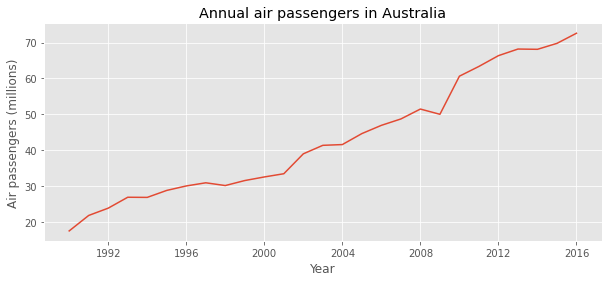

In [ ]:
#@title
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/ausair.csv'
data = pd.read_csv(data_url, index_col=0, parse_dates=["time"])
data.set_index("time", inplace=True)
train_data = data["value"].loc["1990":]
plt.figure(figsize=(10,4))
plt.plot(train_data)
plt.title('Annual air passengers in Australia')
plt.xlabel('Year')
plt.ylabel('Air passengers (millions)')
plt.show()

The data shows a clear **trending** behavior and **no seasonality**.

The [`Holt`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.Holt.html) method of the statsmodels library provides an implementation of this method. We apply Holt’s linear trend method and the damped trend method. 

We can explicitly provide the model with the parameters $\alpha$, $l_0$, $\beta$, and $b_0$ values but we let statsmodels to automatically find optimized values.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


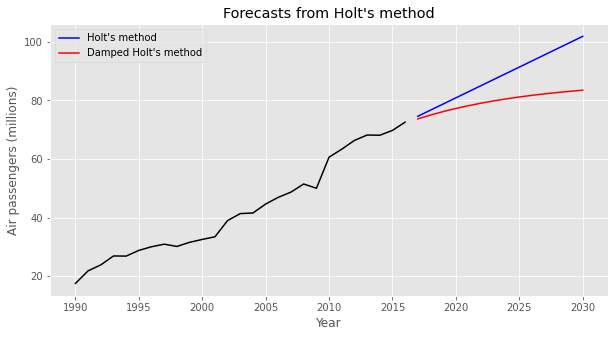

In [ ]:
#@title
from statsmodels.tsa.api import Holt

fit = Holt(endog=train_data, initialization_method="estimated").fit() 
forecast = fit.forecast(14)

fit2 = Holt(
    endog=train_data, 
    damped_trend=True, 
    initialization_method="estimated"
).fit(damping_trend=0.9)
forecast2 = fit2.forecast(14)

plt.figure(figsize=(10, 5))
plt.plot(train_data, color='black')
plt.plot(forecast, color='blue', label="Holt's method")
plt.plot(forecast2, color='red', label="Damped Holt's method")
plt.legend()
plt.title("Forecasts from Holt's method")
plt.xlabel('Year')
plt.ylabel('Air passengers (millions)')
plt.show()

We have set the damping parameter to a relatively low number ($\phi=0.9$) to exaggerate the effect of damping for comparison. Usually, we would estimate $\phi$ along with the other parameters. We have also used a rather large forecast horizon ($h=15$) to highlight the difference between a damped trend and a linear trend. In practice, we would not normally want to forecast so many years ahead with only 27 years of data.

## Holt-winters <a name="5.3"></a>

Holt and Winters extended Holt’s method to **capture seasonality**. The **Holt-Winters seasonal method comprises the forecast equation and three smoothing equations**: one for the level $l_t$, one for the trend $b_t$, and one for the seasonal component $s_T$, with corresponding smoothing parameters $\alpha$, $\beta$, and $\gamma$. We use **$m$ to denote the frequency of the seasonality**, i.e., the number of seasons in a year. For example, for quarterly data $m=4$, and for monthly data $m=12$.

There are **two variations** of this method that differ in the nature of the seasonal component. 

- The **additive method** is preferred when the **seasonal variations are** roughly **constant through the series**.

 The seasonal component is expressed in absolute terms in the scale of the observed series, and in the level equation the series is seasonally adjusted by subtracting the seasonal component. Within each year, the seasonal component will add up to approximately zero.

- The **multiplicative method** is preferred when the **seasonal variations are changing proportional to the level of the series**.

 The seasonal component is expressed in relative terms (percentages), and the series is seasonally adjusted by dividing through by the seasonal component. Within each year, the seasonal component will sum up to approximately $m$.

More details about this methods is available [here](https://otexts.com/fpp2/holt-winters.html).

**Example**. We apply Holt-Winters’ method with both additive and multiplicative seasonality to forecast quarterly visitor nights in Australia spent by international tourists. The next figure shows the data since 2005. The data show an obvious seasonal pattern, with peaks observed in the March quarter of each year, corresponding to the Australian summer.

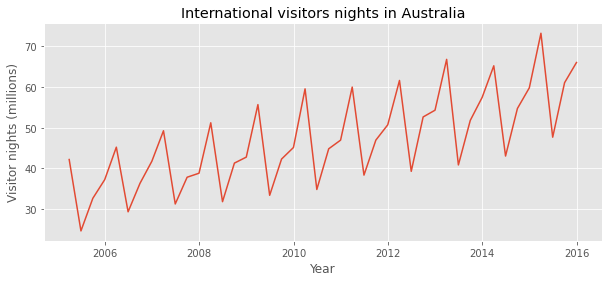

In [ ]:
#@title
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/austourists.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='1/1/1999', end='31/12/2015', freq="Q")
data.set_index(index, inplace=True)
train_data = data["value"].loc["2005":]
plt.figure(figsize=(10,4))
plt.plot(train_data)
plt.title('International visitors nights in Australia')
plt.xlabel('Year')
plt.ylabel('Visitor nights (millions)')
plt.show()


The [`ExponentialSmoothing`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html) method of the statsmodels library provides an implementation of this method. We can explicitly provide the model with the parameters values but we let statsmodels to automatically find optimized values.

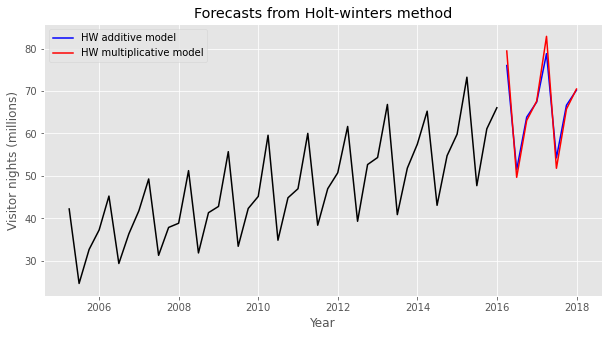

In [ ]:
#@title
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(
    endog=train_data, 
    seasonal_periods=4, 
    trend='add',
    seasonal='add', 
    initialization_method="estimated"
).fit()
forecast1 = fit1.forecast(8)

fit2 = ExponentialSmoothing(
    endog=train_data, 
    seasonal_periods=4, 
    trend='add',
    seasonal='mul', 
    initialization_method="estimated"
).fit()
forecast2 = fit2.forecast(8)

plt.figure(figsize=(10, 5))
plt.plot(train_data, color='black')
plt.plot(forecast1, color='blue', label='HW additive model')
plt.plot(forecast2, color='red', label='HW multiplicative model')
plt.legend()
plt.title("Forecasts from Holt-winters method")
plt.xlabel('Year')
plt.ylabel('Visitor nights (millions)')
plt.show()

We can compare the training RMSE from both models.

In [ ]:
#@title
print(f'RMSE for HW additive model: {fit1.sse}')
print(f'RMSE for HW multiplicative model: {fit2.sse}')

RMSE for HW additive model: 135.92073938312532
RMSE for HW multiplicative model: 105.17469834036028


 In this case, the method with multiplicative seasonality fits the data best. This was to be expected, as the time plot shows that the seasonal variation in the data increases as the level of the series increases. This is also reflected in the two sets of forecasts; the forecasts generated by the method with the multiplicative seasonality display larger and increasing seasonal variation as the level of the forecasts increases compared to the forecasts generated by the method with additive seasonality.

Let's print the parameters estimated and plot the states estimated for both models:

In [ ]:
#@title
print('Parameters estimated for the HW additive model:')
print(f'Alpha: {fit1.params["smoothing_level"]:.2f}')
print(f'Beta: {fit1.params["smoothing_trend"]:.2f}')
print(f'Gamma: {fit1.params["smoothing_seasonal"]:.2f}')
print('\nParameters estimated for the HW multiplicative model:')
print(f'Alpha: {fit2.params["smoothing_level"]:.2f}')
print(f'Beta: {fit2.params["smoothing_trend"]:.2f}')
print(f'Gamma: {fit2.params["smoothing_seasonal"]:.2f}')

Parameters estimated for the HW additive model:
Alpha: 0.26
Beta: 0.00
Gamma: 0.45

Parameters estimated for the HW multiplicative model:
Alpha: 0.36
Beta: 0.00
Gamma: 0.00


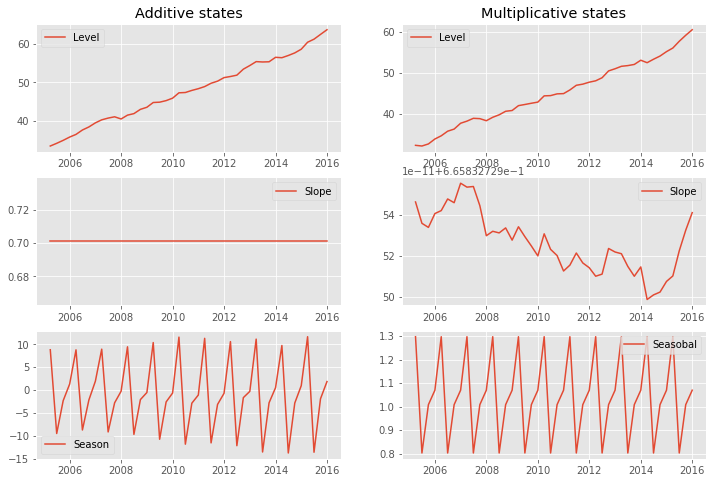

In [ ]:
#@title
fig, axes = plt.subplots(3, 2, figsize=(12,8))
axes = axes.ravel()
axes[0].plot(fit1.level, label='Level')
axes[0].legend()
axes[0].set_title('Additive states')
axes[1].plot(fit2.level, label='Level')
axes[1].legend()
axes[1].set_title('Multiplicative states')
axes[2].plot(fit1.trend, label='Slope')
axes[2].legend()
axes[3].plot(fit2.trend, label='Slope')
axes[3].legend()
axes[4].plot(fit1.season, label='Season')
axes[4].legend()
axes[5].plot(fit2.season, label='Seasobal')
axes[5].legend()
plt.legend()
plt.show()

The small value of $\gamma$ for the multiplicative model means that the seasonal component hardly changes over time. The small value of $\beta$
for the additive model means the slope component hardly changes over time. The increasing size of the seasonal component for the additive model suggests that the model is less appropriate than the multiplicative model.

**Holt-Winters’ damped method**

**Damping is possible with both additive and multiplicative Holt-Winters’ methods**. A method that often provides accurate and robust forecasts for seasonal data is the Holt-Winters method with a damped trend and multiplicative seasonality. An example is available [here](https://otexts.com/fpp2/holt-winters.html#example-holt-winters-method-with-daily-data).

## Generalization of exponential smoothing methods <a name="5.4"></a>

Exponential smoothing methods are not restricted to those we have presented so far. By **considering variations in the combinations of the trend and seasonal components, nine exponential smoothing methods are possible**. Each method is labelled by a pair of letters $(T,S)$ defining the type of "Trend" and "Seasonal" components. For example, $(A,M)$ is the method with an additive trend and multiplicative seasonality; $(A_d,N)$ is the method with damped trend and no seasonality; and so on.

A summary of all methods is available [here](https://otexts.com/fpp2/taxonomy.html).

## State space models for exponential smoothing <a name="5.5"></a>

In this section we are going to study the statistical models that underlie the exponential smoothing methods we have considered so far. The exponential smoothing **methods** presented are algorithms which **generate point forecasts**. The **statistical models** in this section **generate the same point forecasts, but can also generate prediction (or forecast) intervals**. A statistical model is a stochastic (or random) data generating process that can produce an entire forecast distribution.

Each model consists of a measurement equation that describes the observed data, and some state equations that describe how the unobserved components or states (level, trend, seasonal) change over time. Hence, these are referred to as state space models.

**For each method there are two models**: one with **additive errors and** one with **multiplicative errors**. The point forecasts produced by the models are identical if they use the same smoothing parameter values. They will, however, **generate different prediction intervals**.

We label each state space model as $ETS(.,.,.)$ for (Error, Trend, Seasonality).

**ETS$(A,N,N)$: simple exponential smoothing with additive errors**

As we saw, the component form of simple exponential smoothing is

$$\hat{y}_{t+h|t}=l_t$$
$$l_t=\alpha y_t + (1-\alpha)l_{t-1}$$
 
If we re-arrange the smoothing equation for the level, we get the "error correction" form:

$$l_t=l_{t-1}+\alpha(y_t-l_{t-1})=l_{t-1}+\alpha e_t$$

where $e_t=y_t-l_{t-1}=y_t-\hat{y}_{t|t-1}$ is the residual at time $t$.

The training data errors lead to the adjustment of the estimated level throughout the smoothing process for $t=1,...,T$. For example, if the error at time $t$ is negative, then $y_t<\hat{y}_{t|t-1}$ and so the level at time $t-1$ has been over-estimated. The new level $l_t$ is then the previous level $l_{t-1}$ adjusted downwards. The closer $\alpha$ is to one, the "rougher" the estimate of the level (large adjustments take place). The smaller the $\alpha$, the "smoother" the level.

We can also write $y_t=l_{t-1}+e_t$, so that each observation can be represented by the previous level plus an error. To make this into an innovations state space model, all we need to do is specify the probability distribution for $e_t$. For a model with additive errors, we **assume that residuals** (the one-step training errors) $e_t$ **are normally distributed** white noise with mean 0 and variance $\sigma^2$, $e_t \backsim NID(0,\sigma^2)$; NID stands for "normally and independently distributed".

Then the equations of the model can be written as

$$y_t=l_{t-1}+e_t$$
$$l_t=l_{t-1}+\alpha e_t$$

We refer to this equations as the measurement (or observation) equation and the state (or transition) equation respectively. These two equations, together with the statistical distribution of the errors, form a fully specified statistical model. Specifically, these constitute an innovations state space model underlying simple exponential smoothing.

The term “innovations” comes from the fact that all equations use the same random error process $e_t$.

The measurement equation shows the relationship between the observations and the unobserved states. In this case, observation $y_t$ is a linear function of the level $l_{t-1}$, the predictable part of $y_t$, and the error $e_t$, the unpredictable part of $y_t$. For other innovations state space models, this relationship may be nonlinear.

The state equation shows the evolution of the state through time. The influence of the smoothing parameter $\alpha$ is the same as for the methods discussed earlier. For example, $\alpha$ governs the amount of change in successive levels: high values of $alpha$ allow rapid changes in the level; low values of $\alpha$lead to smooth changes. If $\alpha=0$, the level of the series does not change over time; if $\alpha=1$, the model reduces to a random walk model, $y_t=y_{t-1}+e_t$.

**Other models**

Similarly, we can write an innovations state space model for each of the exponential smoothing methods (simple exponential smoothing with multiplicative errors, Holt’s linear method with additive or multiplicative errors, etc). More details are available [here](https://otexts.com/fpp2/ets.html).

To apply these models in the statsmodels library we can use the [`ETSModel`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.exponential_smoothing.ets.ETSModel.html) function. A guide is available [here](https://www.statsmodels.org/stable/examples/notebooks/generated/ets.html).

**Forecasting with ETS models**

Point forecasts are obtained from the models by iterating the equations for $t=T+1,...$ and setting all $e_t=0$ for $t>T$.

The **point forecasts** obtained from the **method and the corresponding models** that underlie the method **are identical** (assuming that the same parameter values are used).

A big advantage of the models is that **prediction intervals can also be generated** (something that cannot be done using the methods). The prediction intervals **will differ between models with additive and multiplicative methods**. More details are available [here](https://otexts.com/fpp2/ets-forecasting.html).

## Estimation and model selection <a name="5.6"></a>

An alternative to **estimating the parameters** by **minimising the sum of squared errors** is to **maximise the "likelihood"**. More details are available [here](https://otexts.com/fpp2/estimation-and-model-selection.html#estimating-ets-models).

A great advantage of the ETS statistical framework is that **information criteria can be used for model selection**. The $AIC$, $AIC_c$ and $BIC$ measures can be used here to determine which of the ETS models is most appropriate for a given time series. More details are available [here](https://otexts.com/fpp2/estimation-and-model-selection.html#model-selection).

# ARIMA models <a name="6"></a>

Exponential smoothing and ARIMA models are the two most widely used approaches to time series forecasting. **While exponential smoothing** models are **based on a description of the trend and seasonality** in the data, **ARIMA** models aim to **describe the autocorrelations in the data**.

## Stationarity and differencing <a name="6.1"></a>

A time series is **stationary** if its **properties do not depend on the time** at which the series is observed. Thus, time series with **trends or seasonality are not stationary** (the trend and seasonality will affect the value of the time series at different times). On the other hand, a **white noise series is stationary** (it does not matter when we observe it, it should look much the same at any point in time).

Some cases can be confusing. For example, a **time series with cyclic behavior (but without trend or seasonality) is stationary**. This is because the cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be.

In general, a stationary time series will have **no predictable patterns in the long-term**. Time plots will show the series to be roughly horizontal (although some cyclic behavior is possible), with **constant variance**.

Consider the nine series plotted in the next figure.

![](https://otexts.com/fpp2/fpp_files/figure-html/stationary-1.png)

- (a) Google stock price for 200 consecutive days; 
- (b) Daily change in the Google stock price for 200 consecutive days; 
- (c) Annual number of strikes in the US; 
- (d) Monthly sales of new one-family houses sold in the US; 
- (e) Annual price of a dozen eggs in the US (constant dollars); 
- (f) Monthly total of pigs slaughtered in Victoria, Australia; 
- (g) Annual total of lynx trapped in the McKenzie River district of north-west Canada; 
- (h) Monthly Australian beer production; 
- (i) Monthly Australian electricity production.

Which of these series are stationary? Seasonality patterns rules out series (d), (h),and (i). Trends and changing levels rules out series (a), (c), (e), (f), and (i). Increasing variance also rules out (i). That leaves only (b) and (g) as stationary series. The strong cycles in series (g) might appear to make it non-stationary, but these cycles are aperiodic, in the long-term, the timing of these cycles is not predictable.


In the previous figure, the Google stock price for 200 consecutive days (a) was non-stationary, but the daily changes of it (b) were stationary. This shows one way to make a non-stationary time series stationary: **compute the differences between consecutive observations**. This is known as **differencing**.

Transformations such as **logarithms can help to stabilize the variance** of a time series. **Differencing** can help ** stabilize the mean** of a time series by removing changes in the level of a time series, and therefore **eliminating (or reducing) trend and seasonality**.

The **ACF plot** (explained in the section "Time series graphics") is also **useful for identifying non-stationary** time series. For a **stationary time series**, the **ACF will drop to zero relatively quickly**, while the **ACF of non-stationary data decreases slowly**. Also, for non-stationary data, the value of $r_1$ is often large and positive.

**Example**: Let's see the ACF for the Google stock price and its differenced series. We can compute the differenced series using the [`diff`](https://pandas.pydata.org/docs/reference/api/pandas.Series.diff.html) method of a pandas Series object.

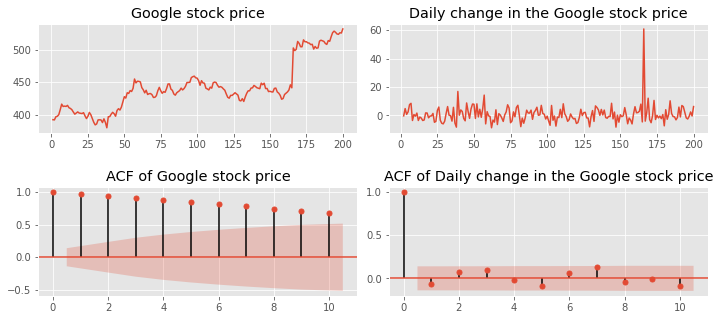

In [ ]:
#@title
import statsmodels.api as sm

# Download the data
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/goog200.csv'
data = pd.read_csv(data_url, index_col=0)

# Plot the data and the ACF
fig, ax = plt.subplots(2,2, figsize=(12,5))
ax = ax.ravel()
fig.subplots_adjust(hspace = .5, wspace=.1)
ax[0].plot(data["value"])
ax[0].title.set_text('Google stock price')
ax[1].plot(data["value"].diff())
ax[1].title.set_text('Daily change in the Google stock price')
_ = sm.graphics.tsa.plot_acf(data["value"], lags=10, ax=ax[2])
ax[2].title.set_text('ACF of Google stock price')
_ = sm.graphics.tsa.plot_acf(data["value"].diff().dropna(), lags=10, ax=ax[3])
ax[3].title.set_text('ACF of Daily change in the Google stock price')

The ACF of the differenced Google stock price looks just like that of a white noise series. No autocorrelations are lying outside the 95% limits.

Let's use the Ljung-Box test (explained in the section "Forecasting tools: Residuals diagnostics") to test if the first autocorrelations are significantly different from what would be expected from a white noise process.

In [ ]:
#@title
import statsmodels.api as sm

sm.stats.acorr_ljungbox(data["value"].diff().dropna(), lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,11.031436,0.355074


The Ljung-Box test gives a p-value of 0.355, which suggests that the daily change in the Google stock price is essentially a random amount which is uncorrelated with that of previous days.

**Differencing**

The **differenced series** is the **change between consecutive observations in the original series**:

$$y^{\prime}_t=y_t - y_{t-1}$$

The differenced series will have only $T-1$ values, since it is not possible to calculate a difference for the first observation.

**When the differenced series is white noise**, we obtain the **"random walk" model**:

$$y^{\prime}_t=\varepsilon_t=y_t - y_{t-1} \implies y_t = y_{t-1}+\varepsilon_t$$

where $\varepsilon_t$ denotes white noise. 

Random walk models are used for non-stationary data, particularly financial and economic data. Random walks typically have:

- long periods of apparent trends up or down
- sudden and unpredictable changes in direction.

The forecasts from a random walk model are equal to the last observation, as future movements are unpredictable, and are equally likely to be up or down. Thus, the random walk model underpins naïve forecasts.

**Second-order differencing**: **Occasionally** the differenced data will not appear to be stationary and **it may be necessary to difference the data a second time to obtain a stationary series**:

  $$y^{\prime \prime}_t=y^{\prime}_t - y^{\prime}_{t-1}$$

  In this case, $y^{\prime \prime}_t$ will have $T-2$ values. Then, we would model the "change in the changes" of the original data. In practice, it is **almost never necessary to go beyond second-order differences**.

**Seasonal differencing**

A seasonal difference is the **difference between an observation and the previous observation from the same season**.

$$y^{\prime}_t=y_t - y_{t-m}$$

where $m$ is the number of seasons. These are **also called "lag-$m$ differences"**, as we subtract the observation after a lag of $m$ periods. To distinguish seasonal differences from ordinary differences, we sometimes refer to ordinary differences as "first differences", meaning differences at lag 1.

If seasonally differenced data appear to be white noise, then an appropriate model for the original data is

$$y_t=y_{t-m} + \varepsilon_t$$

Forecasts from this model are equal to the last observation from the relevant season. That is, this model gives seasonal naïve forecasts.

**Example**: The bottom panel in the next figure shows the seasonal differences of the logarithm of the monthly scripts for antidiabetic drugs sold in Australia. The transformation and differencing have made the series look relatively stationary.

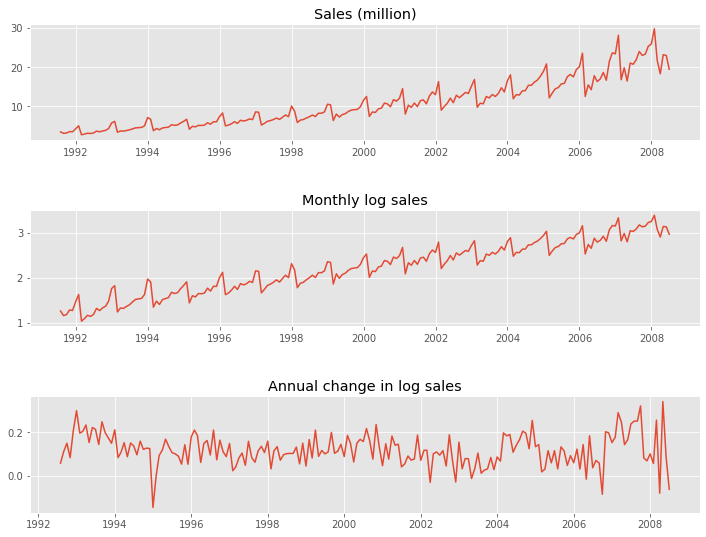

In [ ]:
#@title
# Download and prepare the data
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/a10.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='7/1/1991', end='30/6/2008', freq='M')
data.set_index(index, inplace=True)
# Plot the data, data transformed, and the differenced series
fig, ax = plt.subplots(3,1, figsize=(12,9))
fig.subplots_adjust(hspace = .6)
ax[0].plot(data["value"])
ax[0].title.set_text('Sales (million)')
logs_serie = np.log(data["value"])
ax[1].plot(logs_serie)
ax[1].title.set_text('Monthly log sales')
ax[2].plot(logs_serie.diff(periods=12))
ax[2].title.set_text('Annual change in log sales')

**Sometimes it is necessary** to take both a **seasonal difference and a first difference to obtain stationary data**, as is shown in the following figure. Here, the data are first transformed using logarithms (second panel), then seasonal differences are calculated (third panel). The data still seem somewhat non-stationary, and so a further lot of first differences are computed (bottom panel).

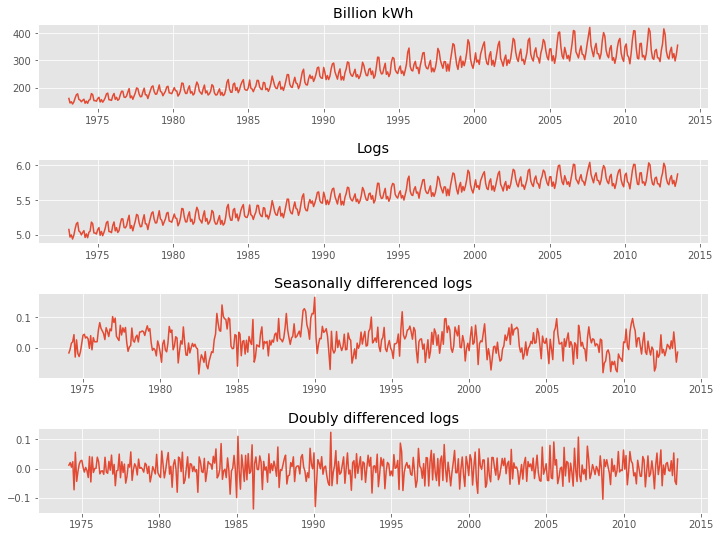

In [ ]:
#@title
# Download and prepare the data
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/usmelec.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='1/1/1973', end='30/6/2013', freq='M')
data.set_index(index, inplace=True)
# Plot the data, data transformed, and differenced series

fig, ax = plt.subplots(4,1, figsize=(12,9))
fig.subplots_adjust(hspace = .6)
ax[0].plot(data["value"])
ax[0].title.set_text('Billion kWh')
logs_serie = np.log(data["value"])
ax[1].plot(logs_serie)
ax[1].title.set_text('Logs')
season_diff_logs_serie = logs_serie.diff(periods=12) 
ax[2].plot(season_diff_logs_serie)
ax[2].title.set_text('Seasonally differenced logs')
doubly_diff_logs_serie = season_diff_logs_serie.diff()
ax[3].plot(doubly_diff_logs_serie)
ax[3].title.set_text('Doubly differenced logs')

When both seasonal and first differences are applied, it makes no difference which is done first (the result will be the same). However, **if the data have** a strong **seasonal pattern**, we recommend that **seasonal differencing be done first**, because the resulting series will sometimes be stationary and there will be no need for a further first difference. If first differencing is done first, there will still be seasonality present.

It is important that if differencing is used, the differences are interpretable. The first differences are the change between one observation and the next. Seasonal differences are the change between one year to the next. Other lags are unlikely to make much interpretable sense and should be avoided.

There is a degree of **subjectivity in selecting which differences to apply**. In this case, we could have decided to stop with the seasonally differenced data, and not done an extra round of differencing (like in the previous example). Or in the previous example, we could have decided that the data were not sufficiently stationary and taken an extra round of differencing.

One way to **determine more objectively whether differencing is required is** to use a [**unit root test**](https://en.wikipedia.org/wiki/Unit_root_test). These **statistical hypothesis tests of stationarity** are designed for determining whether differencing is required. Different unit root tests are based on different assumptions and may lead to conflicting answers. Here, we use the [**KPSS**](https://en.wikipedia.org/wiki/KPSS_test) test (Kwiatkowski, Phillips, Schmidt, & Shin, 1992). In this test, the **null hypothesis** is that the **data are stationary**, and we look for evidence that the null hypothesis is false. Consequently, **small p-values (e.g., less than 0.05) suggest that differencing is required**. 

The test can be computed using the [kpss](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html) function from the statsmodels library. For example, let us apply it to the Google stock price data.

In [ ]:
#@title
from statsmodels.tsa.stattools import kpss

data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/goog200.csv'
data = pd.read_csv(data_url, index_col=0)
statistic, p_value, n_lags, critical_values = kpss(
    x=data["value"], 
    nlags=7
)
print(f'Statistic: {statistic}')
print(f'P-value: {p_value}')
print(f'Critical values: {critical_values}')
print(f'Number of lags: {n_lags}')

Statistic: 1.7760821001377325
P-value: 0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Number of lags: 7


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


The test statistic is much bigger than the 1% critical value, indicating that the null hypothesis is rejected (p-value is less than $\alpha=0.05$). That is, the data are not stationary. We can difference the data, and apply the test again.

In [ ]:
#@title
statistic, p_value, n_lags, critical_values = kpss(
    x=data["value"].diff().dropna(), 
    nlags=7
)
print(f'Statistic: {statistic}')
print(f'P-value: {p_value}')
print(f'Critical values: {critical_values}')
print(f'Number of lags: {n_lags}')

Statistic: 0.11202508260981536
P-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Number of lags: 7


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


This time, the test statistic is tiny, and well within the range we would expect for stationary data. So we can conclude that the differenced data are stationary.

## Autoregressive models <a name="6.2"></a>

In a regression model, we predict the variable of interest using a linear combination of predictors. In an **autoregression model**, we forecast the variable of interest using a **linear combination of past values of the variable**. The term autoregression indicates that it is a **regression of the variable against itself**.

Thus, an **autoregressive model of order $p$**, or **AR$(p)$ model**, can be written as

$$y_t = c + \phi_1y_{t-1}+\phi_2y_{t-2}+...+\phi_py_{t-p} + \varepsilon_t$$

where $\varepsilon_t$ is white noise. This is **like a multiple regression but with lagged values of $y_t$ as predictors**.

Autoregressive models are flexible at handle a wide range of different time series patterns. Changing the parameters $\phi_1,...,\phi_p$ results in different time series patterns. The variance of the error term $\varepsilon_t$ will only change the scale of the series, not the patterns. The two series in the next figure show series from an AR$(1)$ model ($y_t=-0.8t_{t-1}+\epsilon_t$) and an AR$(2)$ model ($y_t=1.3t_{t-1}-0.7y_{t-2}+\epsilon_t$). We can use the [ArmaProcess](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.ArmaProcess.html) function of the statsmodels library to simulate these series:

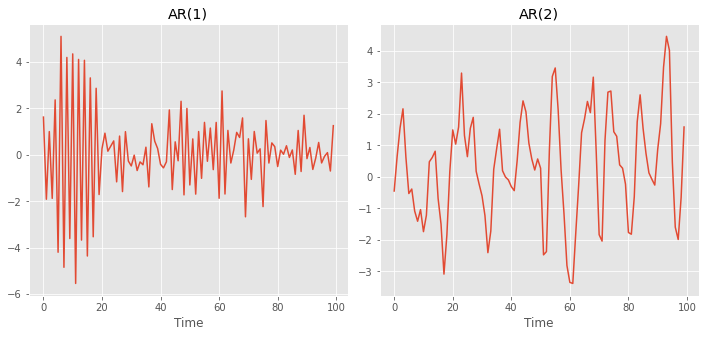

In [ ]:
#@title
from statsmodels.tsa.arima_process import ArmaProcess
# Generate the series
np.random.seed(1)
ar_params1 = np.array([-0.8])
ar1 = np.r_[1, -ar_params1]
AR_object1 = ArmaProcess(ar=ar1)
simulated_data_1 = AR_object1.generate_sample(nsample=100)
ar_params2 = np.array([1.3, -0.7])
ar2 = np.r_[1, -ar_params2]
AR_object2 = ArmaProcess(ar=ar2)
simulated_data_2 = AR_object2.generate_sample(nsample=100)
# Plot the series
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.subplots_adjust(wspace=.1)
ax[0].plot(simulated_data_1)
ax[0].title.set_text('AR(1)')
ax[0].set_xlabel('Time')
ax[1].plot(simulated_data_2)
ax[1].title.set_text('AR(2)')
ax[1].set_xlabel('Time')
plt.show()

For an AR(1) model:

- when $\phi_1=0$, $y_t$ is equivalent to white noise;
- when $\phi_1=1$, and $c=0$, $y_t$ is equivalent to a random walk;
- when $\phi_1=1$, and $c\neq0$, $y_t$ is equivalent to a random walk with drift;

- when $\phi_1 < 0$, $y_T$ tends to oscillate around the mean.

We normally **restrict autoregressive models to stationary data**, in which case some **constraints** on the values **of the parameters** are required.

- For an AR(1) model: $-1 < \phi_1 < 1$.

- For an AR(2) model: $-1 < \phi_2 < 1$, $\phi_1 + \phi_2 < 1$, $\phi_1 - \phi_2 < 1$.

When $p \geq 3$, the restrictions are more complicated.

## Moving average models <a name="6.3"></a>

Rather than using past values of the forecast variable in a regression, a **moving average model uses past forecast errors in a regression-like model**.

$$y_t = c + \varepsilon_t + \theta_1\varepsilon_{t-1}+\theta_2\varepsilon_{t-2}+...+\theta_q\varepsilon_{t-q}$$

where $\varepsilon_t$ is white noise. We refer to this as an **MA$(q)$ model, a moving average model of order $q$**. Of course, we do not observe the values of $\varepsilon_t$, so it is not really a regression in the usual sense.

Notice that each value of $y_t$ **can be thought of as a weighted moving average of the past few forecast errors**. However, moving average models should **not** be **confused with the moving average smoothing** we discussed in Section "Time series decomposition: Moving averages". A moving average model is used for forecasting future values, while moving average smoothing is used for estimating the trend-cycle of past values.

The next figure shows some data from an MA(1) model ($y_t=\varepsilon_t+0.8\varepsilon_{t-1}$) and an MA(2) model ($y_t=\varepsilon_t-\varepsilon_{t-1}+0.8\varepsilon_{t-2}$). Changing the parameters $\theta_1,...,\theta_q$ results in different time series patterns. As with autoregressive models, the variance of the error term $\varepsilon_t$ will only change the scale of the series, not the patterns.

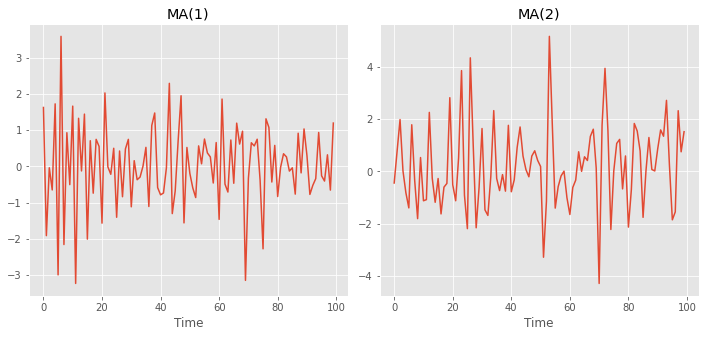

In [ ]:
#@title
from statsmodels.tsa.arima_process import ArmaProcess
# Generate the series
np.random.seed(1)
ma_params1 = np.array([0.8])
ma1 = np.r_[1, -ma_params1]
MA_object1 = ArmaProcess(ma=ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=100)
ma_params2 = np.array([-1, 0.8])
ma2 = np.r_[1, -ma_params2]
MA_object2 = ArmaProcess(ma=ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=100)
# Plot the series
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.subplots_adjust(wspace=.1)
ax[0].plot(simulated_data_1)
ax[0].title.set_text('MA(1)')
ax[0].set_xlabel('Time')
ax[1].plot(simulated_data_2)
ax[1].title.set_text('MA(2)')
ax[1].set_xlabel('Time')
plt.show()

The MA model is called **invertible**. That is, **we can write any invertible MA$(q)$ process as an AR$(\infty)$ process**. Invertible models are not simply introduced to enable us to convert from MA models to AR models. They also have some desirable mathematical properties.


- When $|\theta| > 1$, the weights increase as lags increase, so the more distant the observations the greater their influence on the current error. 

- When $|\theta| = 1$, the weights are constant in size, and the distant observations have the same influence as the recent observations. 

- As neither of these situations makes much sense, we require $|\theta| < 1$, so the most recent observations have a higher weight than observations from the more distant past. Thus, the process is invertible when $|\theta| < 1$.

The **invertibility constraints** for other models are similar to the stationarity constraints:

- For an MA(1) model: $-1 < \theta_1 < 1$.

- For an MA(2) model: $-1 < \theta_2 < 1$, $\theta_1 + \theta_2 > -1$, $\theta_1 - \theta_2 < 1$.

When $q \geq 3$, the restrictions are more complicated.

## Non-seasonal ARIMA models <a name="6.4"></a>

If we **combine differencing with autoregression and a moving average model**, we obtain a **non-seasonal ARIMA model**. ARIMA is an acronym for AutoRegressive Integrated Moving Average (in this context, "integration" is the reverse of differencing). The full model can be written as

$$y^{\prime}_t = c + \phi_1y^{\prime}_{t-1}+...+\phi_py^{\prime}_{t-p} + \theta_1\varepsilon_{t-1}+...+\theta_q\varepsilon_{t-q}+  \varepsilon_t$$

where $y^{\prime}_t$ is the differenced series (it may have been differenced more than once). The "predictors" on the right-hand side include both lagged values of $y_t$ and lagged errors. We call this an ARIMA$(p,d,q)$ model, where

- $p$ is the order of the autoregressive part;
- $d$ degree of first differencing involved;
- $q$ is the order of the moving average part.

The same **stationarity and invertibility conditions** that are used for autoregressive and moving average models also **apply to an ARIMA model**.

Many of the models we have already discussed are **special cases of the ARIMA** model:

- White noise: ARIMA$(0,0,0)$
- Random walk: ARIMA$(0,1,0)$ with no constant
- Random walk with drift: ARIMA$(0,1,0)$ with a constant
- Autoregression: ARIMA$(p,0,0)$
- Moving average: ARIMA$(0,0,q)$

Once we start combining components in this way to form more complicated models, it is much easier to work with the [backshift notation](https://otexts.com/fpp2/backshift.html). The **previous equation** can be written in **backshift notation** as

$$(1-\phi_1B+...-\phi_pB^p)(1-B)^dy_t = c + (1 + \theta_1B+...+\theta_qB^q )\varepsilon_t$$

Selecting appropriate values for $p$, $d$, and $q$ can be difficult. We can rely on a hyperparameter optimization tool, but anything automated can be a little dangerous, and it is worth understanding something of the behavior of the models even when we rely on an automatic procedure to choose the model for us.

The constant $c$ has an important effect on the long-term forecasts obtained from these models.

- If $c=0$ and $d=0$, the long-term forecasts will go to zero.

- If $c=0$ and $d=1$, the long-term forecasts will go to a non-zero constant.

- If $c=0$ and $d=2$ , the long-term forecasts will follow a straight line.

- If $c \neq 0$ and $d=0$, the long-term forecasts will go to the mean of the data.

- If $c \neq 0$ and $d=1$, the long-term forecasts will follow a straight line.

- If $c \neq 0$ and $d=2$, the long-term forecasts will follow a quadratic trend.

The value of $d$ also affects the prediction intervals. The higher the value of $d$, the more rapidly the prediction intervals increase in size. For $d=0$, the long-term forecast standard deviation will go to the standard deviation of the historical data, so the prediction intervals will all be essentially the same.

The value of $p$ is important if the data show cycles. To obtain cyclic forecasts, it is necessary to have $p \geq 2$, along with some additional conditions on the parameters. For an AR$(2)$ model, cyclic behaviour occurs if $\phi^2_1 + 4\phi_2 < 0$. In that case, the average period of the cycles is

$$\frac{2\pi}{\text{arc cos}(\frac{-\phi_1(1-\phi_2)}{4\phi_2})}$$

**ACF and PACF plots**

**It is usually not possible to tell, simply from a time plot, what values of $p$ and $q$ are appropriate** for the data. However, it is sometimes possible to **use the ACF** plot, and the closely related **PACF** plot, **to determine appropriate values** for them.

As we discussed in the section "Time series graphics: Autocorrelation", an ACF plot shows the autocorrelations which measure the relationship between $y_t$ and $y_{t-k}$ for different values of $k$. Now if $y_t$ and $y_{t-1}$ are correlated, then $y_{t-1}$ and $y_{t-2}$ must also be correlated. However, then $y_t$ and $y_{t-2}$ might be correlated, simply because they are both connected to $y_{t-1}$, rather than because of any new information contained in $y_{t-2}$ that could be used in forecasting $y_{t}$.

To overcome this problem, we can use **partial autocorrelations**. These measure the relationship between $y_t$ and $y_{t-1}$ after removing the effects of lags $1,2,...,k-1$. So the first partial autocorrelation is identical to the first autocorrelation because there is nothing between them to remove. Each partial autocorrelation can be estimated as the last coefficient in an autoregressive model. Specifically, $\alpha_k$, the $k$th partial autocorrelation coefficient, is equal to the estimate of $\phi_k$ in an AR$(k)$ model. In practice, there are more efficient algorithms for computing $\alpha_k$ than fitting all of these autoregressions, but they give the same results.

If the data are from an ARIMA$(p, d, 0)$ or ARIMA$(0, d, q)$ model, then the ACF and PACF plots can be helpful in determining the value of $p$ or $q$. If $p$ and $q$ are both positive, then the plots do not help in finding suitable values of $p$ and $q$.

The **data may follow an ARIMA$(p,d,0)$ model if** the ACF and PACF plots of the differenced data show the following patterns:

- the **ACF is exponentially decaying** or sinusoidal;
- there is a **significant spike at lag $p$ in the PACF**, but none beyond lag $p$.

The **data may follow an ARIMA$(0, d, q)$ model if** the ACF and PACF plots of the differenced data show the following patterns:

- the **PACF is exponentially decaying** or sinusoidal;
- there is a **significant spike at lag $q$ in the ACF**, but none beyond lag $q$.

The partial autocorrelations have the same critical values of $\pm 1.96\sqrt{T}$ as for ordinary autocorrelations, and these are typically shown on the plot.

The next figures show the ACF and PACF plots for the US consumption data. Although it is a quarterly series, there does not appear to be a seasonal pattern, so we will fit a non-seasonal ARIMA model. 

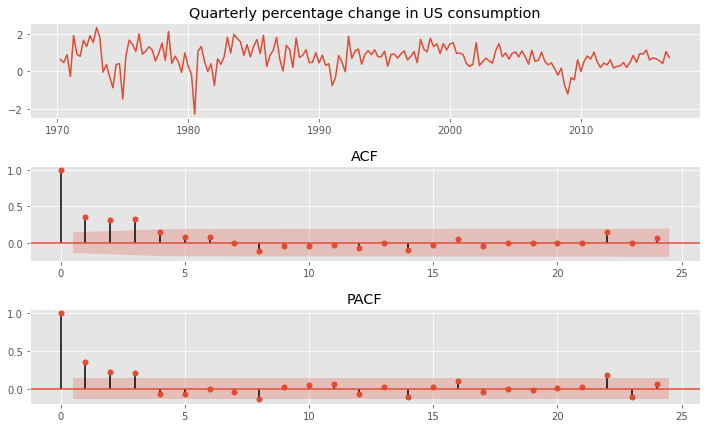

In [ ]:
#@title
import statsmodels.api as sm
# Download and prepare the data
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/uschange.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='1/1/1970', end='30/12/2016', freq='Q')
data.set_index(index, inplace=True)
# Plot the data, ACF and PACF
fig, ax = plt.subplots(3,1, figsize=(12,7))
fig.subplots_adjust(hspace = .5)
ax[0].plot(data["Consumption"])
ax[0].title.set_text('Quarterly percentage change in US consumption')
_ = sm.graphics.tsa.plot_acf(data["Consumption"], lags=24, ax=ax[1])
ax[1].title.set_text('ACF')
_ = sm.graphics.tsa.plot_pacf(data["Consumption"], lags=24, ax=ax[2])
ax[2].title.set_text('PACF')

We see that there are three spikes in the ACF, followed by an almost significant spike at lag 4. In the PACF, there are three significant spikes, and then no significant spikes thereafter (apart from one just outside the bounds at lag 22). We can ignore one significant spike in each plot if it is just outside the limits, and not in the first few lags. After all, the probability of a spike being significant by chance is about one in twenty, and we are plotting 22 spikes in each plot. The pattern in the first three spikes of the PACF is what we would expect from an ARIMA$(3,0,0)$, as the PACF tends to decrease. So in this case, the ACF and PACF lead us to think an ARIMA$(3,0,0)$ model might be appropriate.

We can use the [`ARIMA`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html) function in the statsmodels library to fit this model:

In [ ]:
#@title
from statsmodels.tsa.arima.model import ARIMA

arma_model = ARIMA(data["Consumption"], order=(3, 0, 0))#, trend='n'
arma_result = arma_model.fit()
arma_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                  187
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -165.170
Date:                Wed, 25 Aug 2021   AIC                            340.340
Time:                        09:02:17   BIC                            356.495
Sample:                    03-31-1970   HQIC                           346.886
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7449      0.113      6.578      0.000       0.523       0.967
ar.L1          0.2274      0.058      3.946      0.000       0.114       0.340
ar.L2          0.1604      0.059      2.721      0.007       0.045       0.276
ar.L3          0.2027      0.067      3.025      0.002       0.071       0.334
sigma2         0.3419      0.024     13.957      0.000       0.294       0.390
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                63.29
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Parameters estimation**

Once the model order has been identified (i.e., the values of 
$p$, $d$, and $q$), we need to **estimate the parameters** $c, \phi_1,...,\phi_p, \theta_1,...,\theta_q$. The statsmodels library uses [**maximum likelihood estimation**](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) (MLE). This technique finds the **values of the parameters which maximise the probability of obtaining the data** that we have observed.

Statsmodels will report the value of the log-likelihood of the data; that is, the logarithm of the probability of the observed data coming from the estimated model. For given values of $p$, $d$, and $q$, statsmodels will try to maximize the log-likelihood when finding parameter estimates.

For our ARIMA$(3,0,0)$ model, we can see the value of the log-likelihood in the summary displayed previously (top right corner). We can also compute it:

In [ ]:
#@title
print(f'Log likelihood: {arma_model.loglike(params=arma_result.params)}')

Log likelihood: -165.16988803417553


**Information Criteria**

Akaike’s Information Criterion (**AIC**) is useful **for determining the order** of an ARIMA model. It can be written as

$$\text{AIC}=-2\log(L)+2(p+q+k+1)$$

where $L$ is the likelihood of the data, $k=1$ if $c\neq 0$ and $k=0$ if c=0. 

For ARIMA models, the corrected AIC can be written as

$$\text{AIC}_c=\text{AIC}+\frac{2(p+q+k+1)(p+q+k+2)}{T-p-q-k-2}$$

and the Bayesian Information Criterion (BIC) can be written as

$$\text{BIC}=\text{AIC}+[\log(T)-2](p+q+k+1)$$

Good models are obtained by minimising the $\text{AIC}$, $\text{AIC}_c$ or $\text{BIC}$.

These information criteria tend **not** to be **good** guides **to selecting the appropriate order of differencing** ($d$) of a model, but only for selecting the values of $p$ and $q$. This is because the differencing changes the data on which the likelihood is computed, making the AIC values between models with different orders of differencing not comparable. So we need to use some other approach to choose $d$, and then we can use the $\text{AIC}_c$ to select $p$ and $q$.

**Modelling procedure**

**When fitting an ARIMA model** to a set of (non-seasonal) time series data, the **following procedure** provides a useful **general approach**.

![](https://otexts.com/fpp2/arimaflowchart.png)

An example is available [here](https://otexts.com/fpp2/arima-r.html#example-seasonally-adjusted-electrical-equipment-orders).

**Forecasting**

Point forecasts from the ARIMA models can be calculated using the following three steps.

- Expand the ARIMA equation so that $y_t$ is on the left-hand side and all other terms are on the right.

- Rewrite the equation by replacing $t$ with $T+h$.

- On the right-hand side of the equation, replace future observations with their forecasts, future errors with zero, and past errors with the corresponding residuals.

Beginning with $h=1$, these steps are then repeated for $h=2,3,...$ until all forecasts have been calculated.

An example using an ARIMA$(3,1,1)$ model is available [here](https://otexts.com/fpp2/arima-forecasting.html#point-forecasts).

In the practice, we can use the [`predict`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.predict.html) method of the statsmodels model object indicating the start and the end of the forecasts, or we can use the [`forecast`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html) method indicating the number of steps to forecast. Both methods produce the same result. To obtain prediction intervals we can use the [`get_forecast`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.get_forecast.html) method.

In [ ]:
#@title
print('Prediction for the next 7 steps:')
print(arma_result.forecast(steps=7).values)
# arma_result.predict(start='31/12/2016', end='30/06/2018')
arma_prediction = arma_result.get_forecast(steps=7, alpha=0.05)
print('Prediction intervals: ')
print(arma_prediction.conf_int())

Prediction for the next 7 steps:
[0.72101794 0.79837561 0.75011232 0.74980627 0.75767449 0.74963193
 0.74900295]
Prediction intervals: 
            lower Consumption  upper Consumption
2016-12-31          -0.425021           1.867057
2017-03-31          -0.376932           1.973683
2017-06-30          -0.450081           1.950305
2017-09-30          -0.494774           1.994386
2017-12-31          -0.498028           2.013377
2018-03-31          -0.513858           2.013122
2018-06-30          -0.520693           2.018699


## Seasonal ARIMA models <a name="6.5"></a>

ARIMA models are also capable of modeling a wide range of seasonal data. A **seasonal ARIMA model** (or **SARIMA** model) is formed by **including additional seasonal terms** in the ARIMA models we have seen so far. It is written as follows: $(P,D,Q)_m$, where $m$ is the number of observations per year. We use **uppercase notation for the seasonal parts of the model, and lowercase notation for the non-seasonal** parts of the model.

The **seasonal part** of the model consists of **terms** that are similar to the non-seasonal components of the model, but **involve backshifts of the seasonal period**. For example, an $\text{ARIMA}(1,1,1)(1,1,1)_4$ model (without a constant) is for quarterly data ($m=4$), and can be written as

$$(1-\phi_1B)(1-\Phi_1 B^4)(1-B^4)y_t = (1+\theta_1B)(1+ \Theta_1B^4)\varepsilon_t$$

The additional seasonal terms are simply multiplied by the non-seasonal terms.

**ACF/PACF**

The **seasonal part** of an AR or MA model will be **seen in the seasonal lags of the PACF and ACF***. For example, an $\text{ARIMA}(0,0,0)(0,0,1)_{12}$ model will show:

- a spike at lag 12 in the ACF but no other significant spikes;
- exponential decay in the seasonal lags of the PACF (i.e., at lags 12, 24, 36, …).


Similarly, an $\text{ARIMA}(0,0,0)(1,0,0)_{12}$ model will show:

- exponential decay in the seasonal lags of the ACF;
- a single significant spike at lag 12 in the PACF.

In considering the appropriate **seasonal orders** for a seasonal ARIMA model, we **restrict our attention to the seasonal lags**.

The modeling procedure is almost the same as for non-seasonal data, except that we need to select seasonal AR and MA terms as well as the non-seasonal components of the model.

**Example**: We will describe the seasonal ARIMA modeling procedure using quarterly European retail trade data from 1996 to 2011. The data are plotted in the following figure.

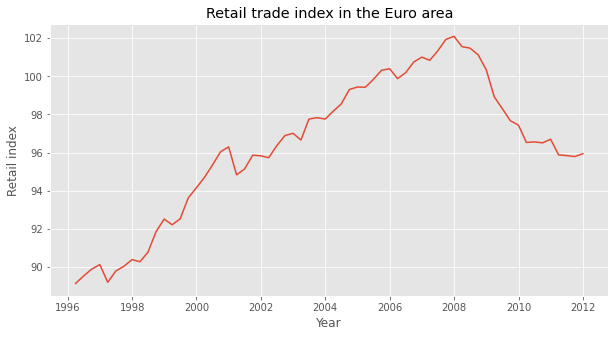

In [ ]:
#@title
# Download and prepare the data
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/euretail.csv'
data = pd.read_csv(data_url, index_col=0)
index = pd.date_range(start='1/1/1996', end='31/12/2011', freq='Q')
data.set_index(index, inplace=True)
train_data = data["value"].loc["1/1/1991":]
# Plot the data
plt.figure(figsize=(10,5))
plt.plot(train_data)
plt.title('Retail trade index in the Euro area')
plt.xlabel('Year')
plt.ylabel('Retail index')
plt.show()

The data are clearly **non-stationary**, with **some seasonality**, so we will first take a **seasonal difference**. These also appear to be non-stationary, so we take an additional first difference, and plot the ACF and PACF.

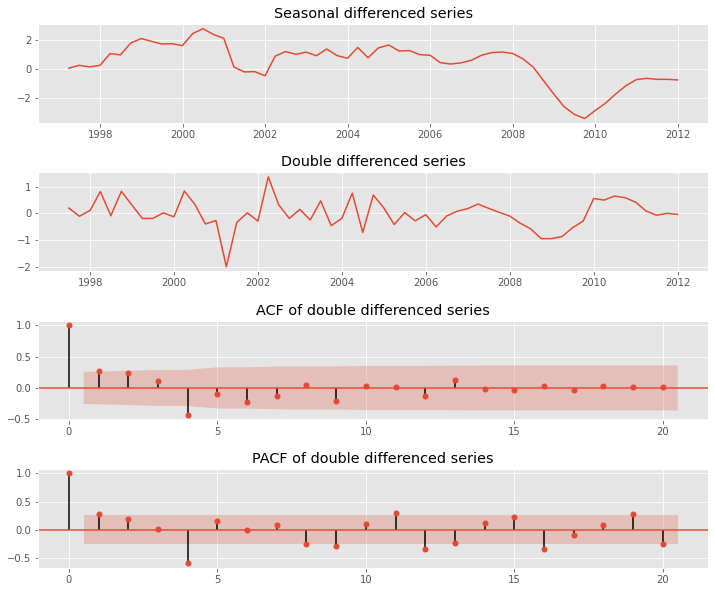

In [ ]:
#@title
import statsmodels.api as sm

m = 4
season_differenced_series = train_data.diff(periods=m).dropna()
double_differenced_series = season_differenced_series.diff(
    periods=1
).dropna()

fig, ax = plt.subplots(4, 1, figsize=(12,10))
fig.subplots_adjust(hspace = .5)
ax[0].plot(train_data.diff(periods=4))
ax[0].title.set_text('Seasonal differenced series')
ax[1].plot(double_differenced_series)
ax[1].title.set_text('Double differenced series')
_ = sm.graphics.tsa.plot_acf(double_differenced_series, lags=20, ax=ax[2])
ax[2].title.set_text('ACF of double differenced series')
_ = sm.graphics.tsa.plot_pacf(double_differenced_series, lags=20, ax=ax[3])
ax[3].title.set_text('PACF of double differenced series')

The significant spike at lag 1 in the ACF suggests a non-seasonal MA$(1)$ component, and the significant spike at lag 4 in the ACF suggests a seasonal MA$(1)$ component. Consequently, we begin with an ARIMA$(0,1,1)(0,1,1)_4$ model, indicating a first and seasonal difference, and non-seasonal and seasonal MA$(1)$ components (by analogous logic applied to the PACF, we could also have started with an ARIMA$(1,1,0)(1,1,0)_4$ model). The residuals for the fitted model are shown in the next figure. 

AIC_c value: 75.72


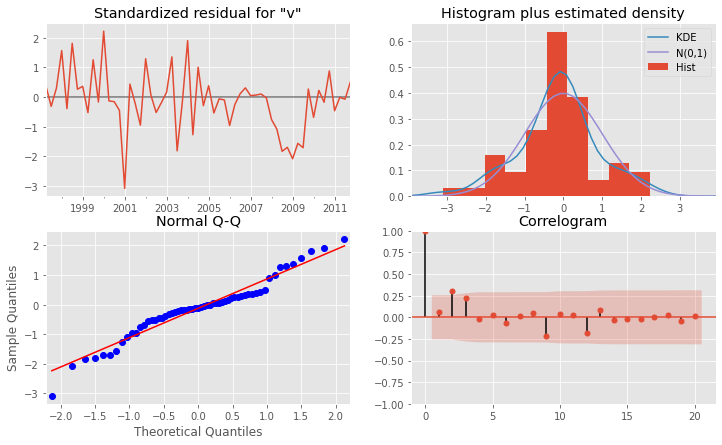

In [ ]:
#@title
from statsmodels.tsa.arima.model import ARIMA
# Fit the model
sarima_model = ARIMA(
    endog=train_data, 
    order=(0, 1, 1), 
    seasonal_order=(0, 1, 1, 4)
)
sarima_result = sarima_model.fit()
print(f'AIC_c value: {sarima_result.aicc:.2f}')
# Plot residuals
sarima_result.plot_diagnostics(figsize = (12, 7), lags=20, );

The ACF shows a significant spike at lag 2, and almost a significant spike at lag 3, indicating that some additional non-seasonal terms need to be included in the model. The $AIC_c$ of the ARIMA$(0,1,2)(0,1,1)_4$ model is 74.36, while that for the ARIMA$(0,1,3)(0,1,1)_4$ model is 68.40. We tried other models with AR terms as well, but none that gave a smaller $AIC_c$ value. Consequently, we choose the ARIMA$(0,1,3)(0,1,1)_4$ model. Its residuals are plotted in the next figure All the spikes are now within the significance limits, so the residuals appear to be white noise. We could use the Ljung-Box test also to show that the residuals have no remaining autocorrelations.

AIC_c value: 68.40


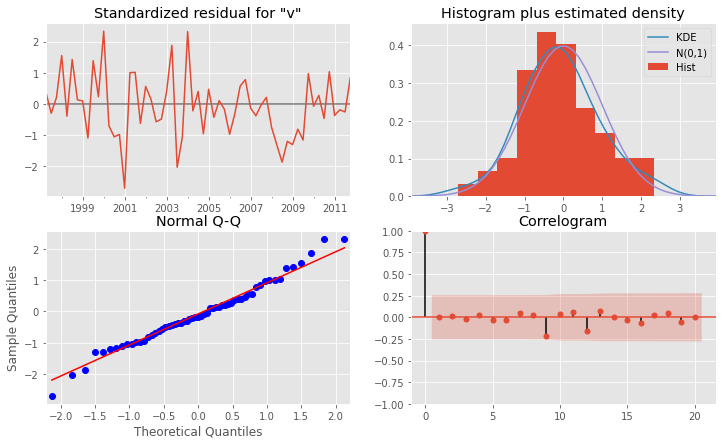

In [ ]:
#@title
# Fit the model 
sarima_model = ARIMA(
    endog=train_data, 
    order=(0, 1, 3), 
    seasonal_order=(0, 1, 1, 4)
)
sarima_result = sarima_model.fit()
print(f'AIC_c value: {sarima_result.aicc:.2f}')
# Plot residuals
sarima_result.plot_diagnostics(figsize = (12, 7), lags=20, );

Thus, we now have a seasonal ARIMA model that passes the required checks and is ready for forecasting. Forecasts from the model for the next three years are shown in the next figure. The forecasts follow the recent trend in the data, because of the double differencing. The large and rapidly increasing prediction intervals show that the retail trade index could start increasing or decreasing at any time (while the point forecasts trend downwards, the prediction intervals allow for the data to trend upwards during the forecast period).

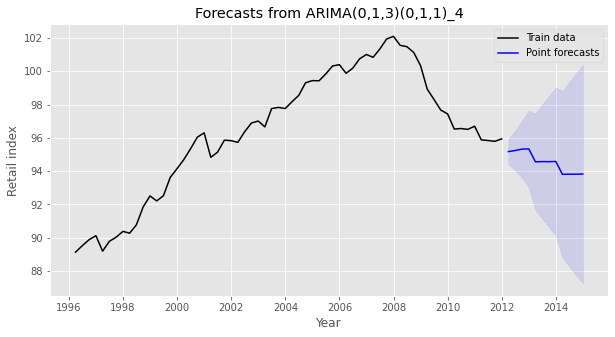

In [ ]:
#@title
# Get point forecasts and prediction intervals
alpha = 0.05
sarima_prediction = sarima_result.get_forecast(steps=12, alpha=alpha)
point_forecasts = sarima_prediction.predicted_mean
prediction_intervals = sarima_prediction.conf_int()
lower_values = prediction_intervals['lower value']
upper_values = prediction_intervals['upper value']
# Plot the data
plt.figure(figsize=(10,5))
plt.plot(train_data, color='black', label='Train data')
plt.plot(point_forecasts, color='blue', label='Point forecasts')
plt.fill_between(
    x=point_forecasts.index, 
    y1=lower_values, 
    y2=upper_values, 
    color='blue', 
    alpha=.1
)
plt.legend()
plt.title('Forecasts from ARIMA(0,1,3)(0,1,1)_4')
plt.xlabel('Year')
plt.ylabel('Retail index')
plt.show()

# Other forecasting methods <a name="7"></a>

**Time series regression models**

In a regression model, we **forecast the time series** of interest $y$ (forecast variable) **assuming that it has a linear relationship with other time series** $x$ (predictor variables).

$$y_t=\beta_0+\beta_1x_{1,t}+\beta_2x_{2,t}+...+\beta_kx_{k,t}+\varepsilon_{t}$$

where $y$ is the forecast variable and $x_1,...,x_k$ are the $k$ predictor variables (numerical variables). The coefficients measure the effect of each predictor after taking into account the effects of all the other predictors in the model. We can think of each observation $y_t$ as consisting of the explained part of the model, $\beta_0+\beta_1x_{1,t}+...+\beta_kx_{k,t}$, and the random "error", $\varepsilon_t$ . The “error” term captures anything that may affect $y_t$ other than the factors considered in the model.

When we use a linear regression model, we are implicitly making some [**assumptions**](https://otexts.com/fpp2/regression-intro.html#assumptions).

To check if exists a linear relationship between the forecast variable and the predictor variable when can plot a scatterplot (the [`scatter_matrix`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) method of the pandas DataFrame object can be helpful). The **strength of these relationships** can be measure with **correlation coefficients** (with the [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method of the pandas DataFrame object for example). 

In python, we can use the [`OLS`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) function of the statsmodels package to fit these types of models.

More details about time series regression models are available [here](https://otexts.com/fpp2/regression.html).

**Dynamic regression models**

The time series models in the previous chapters allow for the inclusion of information from past observations of a series, but not for the inclusion of other information that may also be relevant. The effects of holidays, competitor activity, changes in the law, or the wider economy, may explain some of the historical variation and may lead to more accurate forecasts.

ARIMA models can be extended in order to allow other information to be included in the models.

More details about dynamic regression models are available [here](https://otexts.com/fpp2/dynamic.html).

**Hierarchical or grouped time series**

**Time series** can often be naturally **disaggregated by various attributes** of interest. Hierarchical time series often arise due to geographic divisions. For example, the total bicycle sales can be disaggregated by country, then within each country by state, within each state by region, and so on down to the outlet level.

More details about hierarchical time series are available [here](https://otexts.com/fpp2/hierarchical.html).

## Advanced forecasting methods <a name="7.1"></a>

In this section, we list out four more advanced forecasting methods. We also include links for further reading:

- [Complex seasonality](https://otexts.com/fpp2/complexseasonality.html): Higher frequency time series (daily or hourly data) often exhibit more complicated seasonal patterns.

- [Vector autoregressions (VAR)](https://otexts.com/fpp2/VAR.html)

- [Neural network models](https://otexts.com/fpp2/nnetar.html)

- [Bootstrapping and bagging](https://otexts.com/fpp2/bootstrap.html)

- [Forecast combinations](https://otexts.com/fpp2/combinations.html): use several different methods on the same time series, and to average the resulting forecasts.

- [Facebook Prophet](https://facebook.github.io/prophet/) is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It is robust to missing data and shifts in the trend, and typically handles outliers well. It's designed mainly for high frequency data like daily, hourly, minute etc.

# Forecasting issues <a name="8"></a>

In this final section, we list out some practical issues that arise in forecasting. We also include links for further reading:

- [Weekly, daily and sub-daily data can be challenging for forecasting](https://otexts.com/fpp2/weekly.html)

- [Time series of counts](https://otexts.com/fpp2/counts.html)

- [Ensuring forecasts stay within limits using transformations](https://otexts.com/fpp2/limits.html)



- [Forecasting long and very short time series](https://otexts.com/fpp2/long-short-ts.html)

- [ Dealing with missing values and outliers](https://otexts.com/fpp2/missing-outliers.html)

# References and further reading <a name="9"></a>

- [Forecasting: Principles and Practice](https://otexts.com/fpp2/index.html)

- "Principles of forecasting: A handbook for researchers and practitioners"

- "Principles of business forecasting (2nd ed.)"

- [R datasets](https://vincentarelbundock.github.io/Rdatasets/)

- [Statsmodels User guide](https://www.statsmodels.org/stable/user-guide.html)

- [Exponential smoothing with statsmodels](https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html)